In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os
from sklearn import preprocessing, metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [4]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [5]:
calendar.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

+ wm_yr_wk: The id of the week the date belongs to.
+ weekday: The type of the day (Saturday, Sunday, ..., Friday).
+ wday: The id of the weekday, starting from Saturday.
+ event_name_1: If the date includes an event, the name of this event.
+ event_type_1: If the date includes an event, the type of this event.
+ event_name_2: If the date includes a second event, the name of this event.
+ event_type_2: If the date includes a second event, the type of this event.
+ snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP 3 purchases on the examined date. 1 indicates that SNAP purchases are allowed.

In [7]:
calendar.dtypes

date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d               object
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
dtype: object

In [8]:
sales = pd.read_csv('sales_train_validation.csv')
sales.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

In [9]:
sales.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)

In [10]:
sales.dtypes

id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
             ...  
d_1909       int64
d_1910       int64
d_1911       int64
d_1912       int64
d_1913       int64
Length: 1919, dtype: object

In [11]:
prices = pd.read_csv('sell_prices.csv')
prices.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [12]:
prices.columns

Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price'], dtype='object')

In [13]:
prices.dtypes

store_id       object
item_id        object
wm_yr_wk        int64
sell_price    float64
dtype: object

In [14]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

id  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  \
0  HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
1  HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
2  HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
3  HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
4  HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   

   F19  F20  F21  F22  F23  F24  F25  F26  F27  F28  
0    0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [15]:
sample.columns

Index(['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28'],
      dtype='object')

## Downcasting

In [17]:
# Convert dtypes & Save Memory
import pandas as pd
import numpy as np

# Downcast function to reduce memory usage
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    
    for i, t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        
        elif t == object:  # Updated this line from np.object to object
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    
    return df  

# Apply the fixed downcast function
sales = downcast(sales)
prices = downcast(prices)
calendar = downcast(calendar)

In [18]:
sales.dtypes

id          category
item_id     category
dept_id     category
cat_id      category
store_id    category
              ...   
d_1909          int8
d_1910          int8
d_1911         int16
d_1912         int16
d_1913         int16
Length: 1919, dtype: object

In [19]:
prices.dtypes

store_id      category
item_id       category
wm_yr_wk         int16
sell_price     float16
dtype: object

In [20]:
calendar.dtypes

date            datetime64[ns]
wm_yr_wk                 int16
weekday               category
wday                      int8
month                     int8
year                     int16
d                     category
event_name_1          category
event_type_1          category
event_name_2          category
event_type_2          category
snap_CA                   int8
snap_TX                   int8
snap_WI                   int8
dtype: object

## Data Processing

### Melting Sales Data

In [23]:
# Converts daily sales columns (d_1, d_2, ..., d_1913) into a single column (d)
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
             var_name='d', value_name='sold').dropna()
df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sold  
0       CA  d_1     0  
1       CA  d_1     0  
2       CA  d_1     0  
3       CA  d_1     0  
4       CA  d_1     0

In [24]:
# Example
df[df['item_id'] == 'HOBBIES_1_001']

id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
3049      HOBBIES_1_001_CA_2_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
6098      HOBBIES_1_001_CA_3_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
9147      HOBBIES_1_001_CA_4_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
12196     HOBBIES_1_001_TX_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
58312125  HOBBIES_1_001_TX_2_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
58315174  HOBBIES_1_001_TX_3_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
58318223  HOBBIES_1_001_WI_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
58321272  HOBBIES_1_001_WI_2_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
58324321  HOBBIES_1_001_WI_3_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   

         store_id state_id       d  sold  
0            CA_1       CA     d_1     0  
3049         CA_2       CA     d_1     0  
6098         CA_3       CA     d_1     0  
9147         CA_4       CA     d_1     0  
12196        TX_1       TX     d_1     0  
...           ...      ...     ...   ...  
58312125     TX_2       TX  d_1913     0  
58315174     TX_3       TX  d_1913     0  
58318223     WI_1       WI  d_1913     1  
58321272     WI_2       WI  d_1913     1  
58324321     WI_3       WI  d_1913     0  

[19130 rows x 8 columns]

In [25]:
sales.shape

(30490, 1919)

In [26]:
df.shape

(58327370, 8)

### Merge the data

In [28]:
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

In [29]:
df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sold       date  wm_yr_wk  ... month  year  event_name_1  \
0       CA  d_1     0 2011-01-29     11101  ...     1  2011           NaN   
1       CA  d_1     0 2011-01-29     11101  ...     1  2011           NaN   
2       CA  d_1     0 2011-01-29     11101  ...     1  2011           NaN   
3       CA  d_1     0 2011-01-29     11101  ...     1  2011           NaN   
4       CA  d_1     0 2011-01-29     11101  ...     1  2011           NaN   

   event_type_1 event_name_2 event_type_2 snap_CA snap_TX  snap_WI  sell_price  
0           NaN          NaN          NaN       0       0        0         NaN  
1           NaN          NaN          NaN       0       0        0         NaN  
2           NaN          NaN          NaN       0       0        0         NaN  
3           NaN          NaN          NaN       0       0        0         NaN  
4           NaN          NaN          NaN       0       0        0         NaN  

[5 rows x 22 columns]

### Missing value check

In [31]:
print(df.isnull().sum())  # Count missing values

id                     0
item_id                0
dept_id                0
cat_id                 0
store_id               0
state_id               0
d                      0
sold                   0
date                   0
wm_yr_wk               0
weekday                0
wday                   0
month                  0
year                   0
event_name_1    53631910
event_type_1    53631910
event_name_2    58205410
event_type_2    58205410
snap_CA                0
snap_TX                0
snap_WI                0
sell_price      12299413
dtype: int64


### Aggregation

#### Aggregate at the Store Level

In [34]:
df_store = df.groupby(['date', 'store_id'])['sold'].sum().reset_index()

# Set date as index
df_store = df_store.set_index('date')
print(df_store.head())

           store_id  sold
date                     
2011-01-29     CA_1  4337
2011-01-29     CA_2  3494
2011-01-29     CA_3  4739
2011-01-29     CA_4  1625
2011-01-29     TX_1  2556


In [35]:
calendar.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [36]:
# Merge with calendar info
df_s = df_store.merge(calendar, on='date', how='left')

# Merge with prices based on store and Walmart week
df_s = df_s.merge(prices.groupby(['store_id', 'wm_yr_wk'])['sell_price'].mean().reset_index(), 
                          on=['store_id', 'wm_yr_wk'], how='left')
df_s.head()

date store_id  sold  wm_yr_wk   weekday  wday  month  year    d  \
0 2011-01-29     CA_1  4337     11101  Saturday     1      1  2011  d_1   
1 2011-01-29     CA_2  3494     11101  Saturday     1      1  2011  d_1   
2 2011-01-29     CA_3  4739     11101  Saturday     1      1  2011  d_1   
3 2011-01-29     CA_4  1625     11101  Saturday     1      1  2011  d_1   
4 2011-01-29     TX_1  2556     11101  Saturday     1      1  2011  d_1   

  event_name_1 event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  \
0          NaN          NaN          NaN          NaN        0        0   
1          NaN          NaN          NaN          NaN        0        0   
2          NaN          NaN          NaN          NaN        0        0   
3          NaN          NaN          NaN          NaN        0        0   
4          NaN          NaN          NaN          NaN        0        0   

   snap_WI  sell_price  
0        0    4.081049  
1        0    4.226210  
2        0    4.109827  
3        0    4.024252  
4        0    3.930963

In [37]:
df_s.columns

Index(['date', 'store_id', 'sold', 'wm_yr_wk', 'weekday', 'wday', 'month',
       'year', 'd', 'event_name_1', 'event_type_1', 'event_name_2',
       'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price'],
      dtype='object')

### Plots

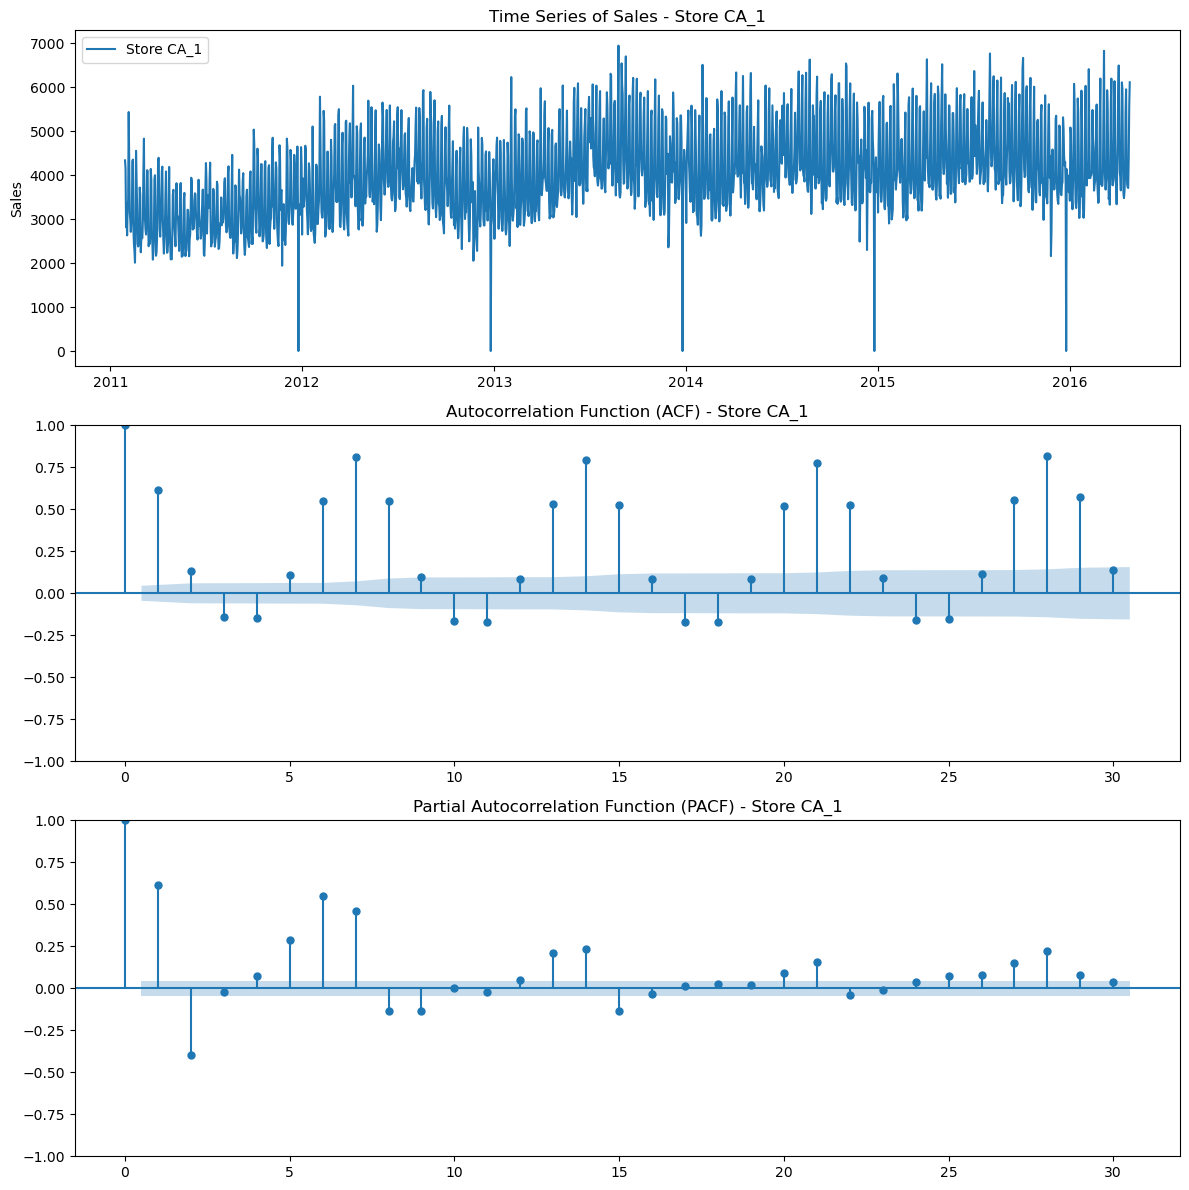

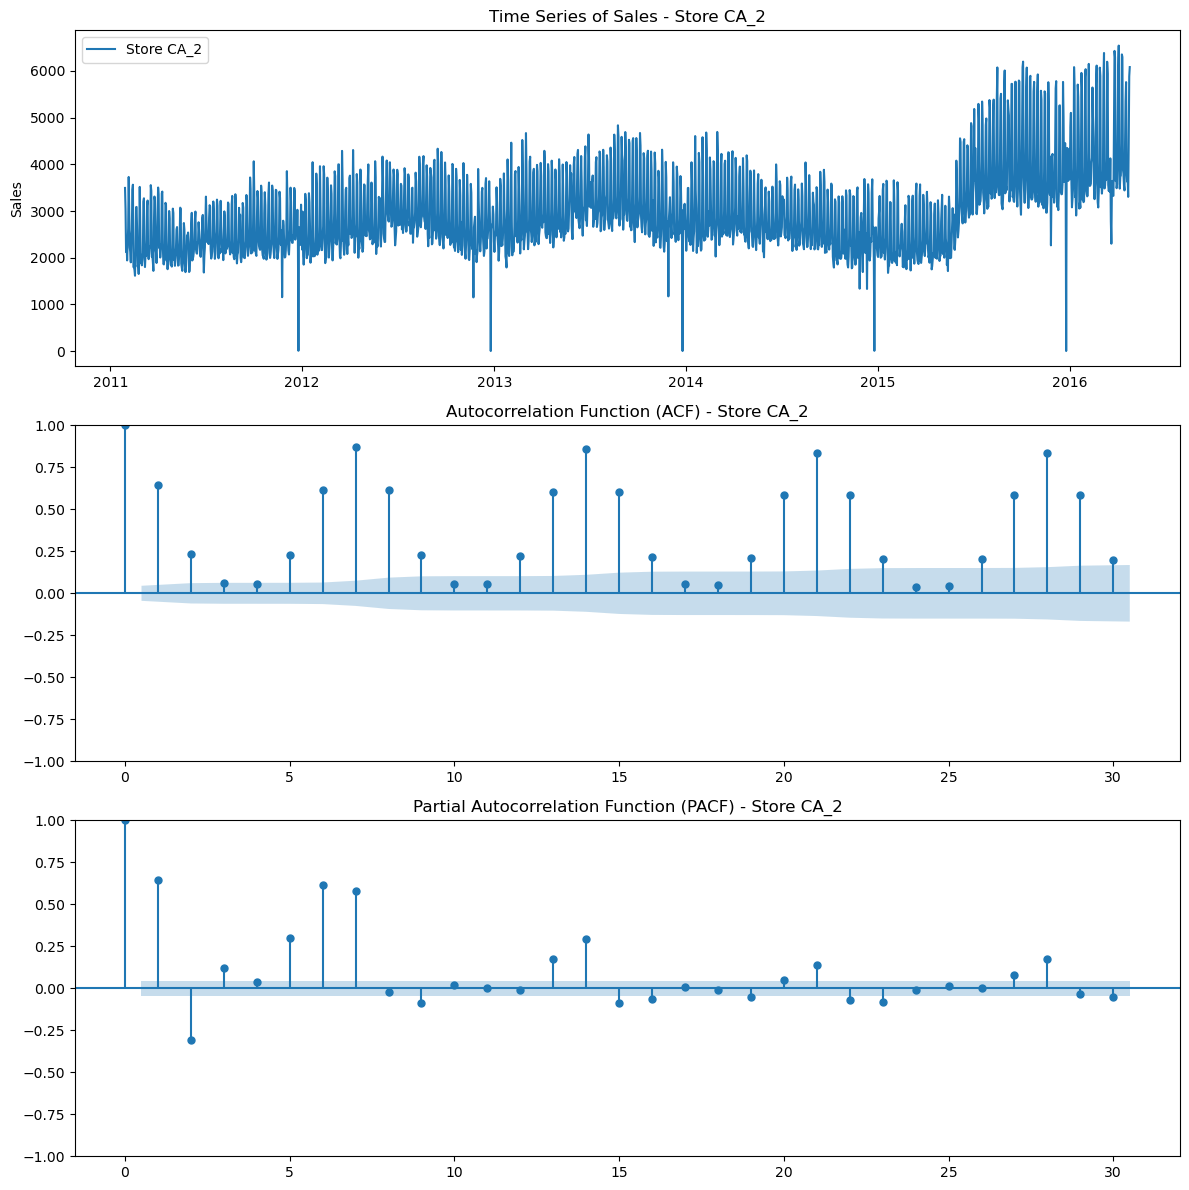

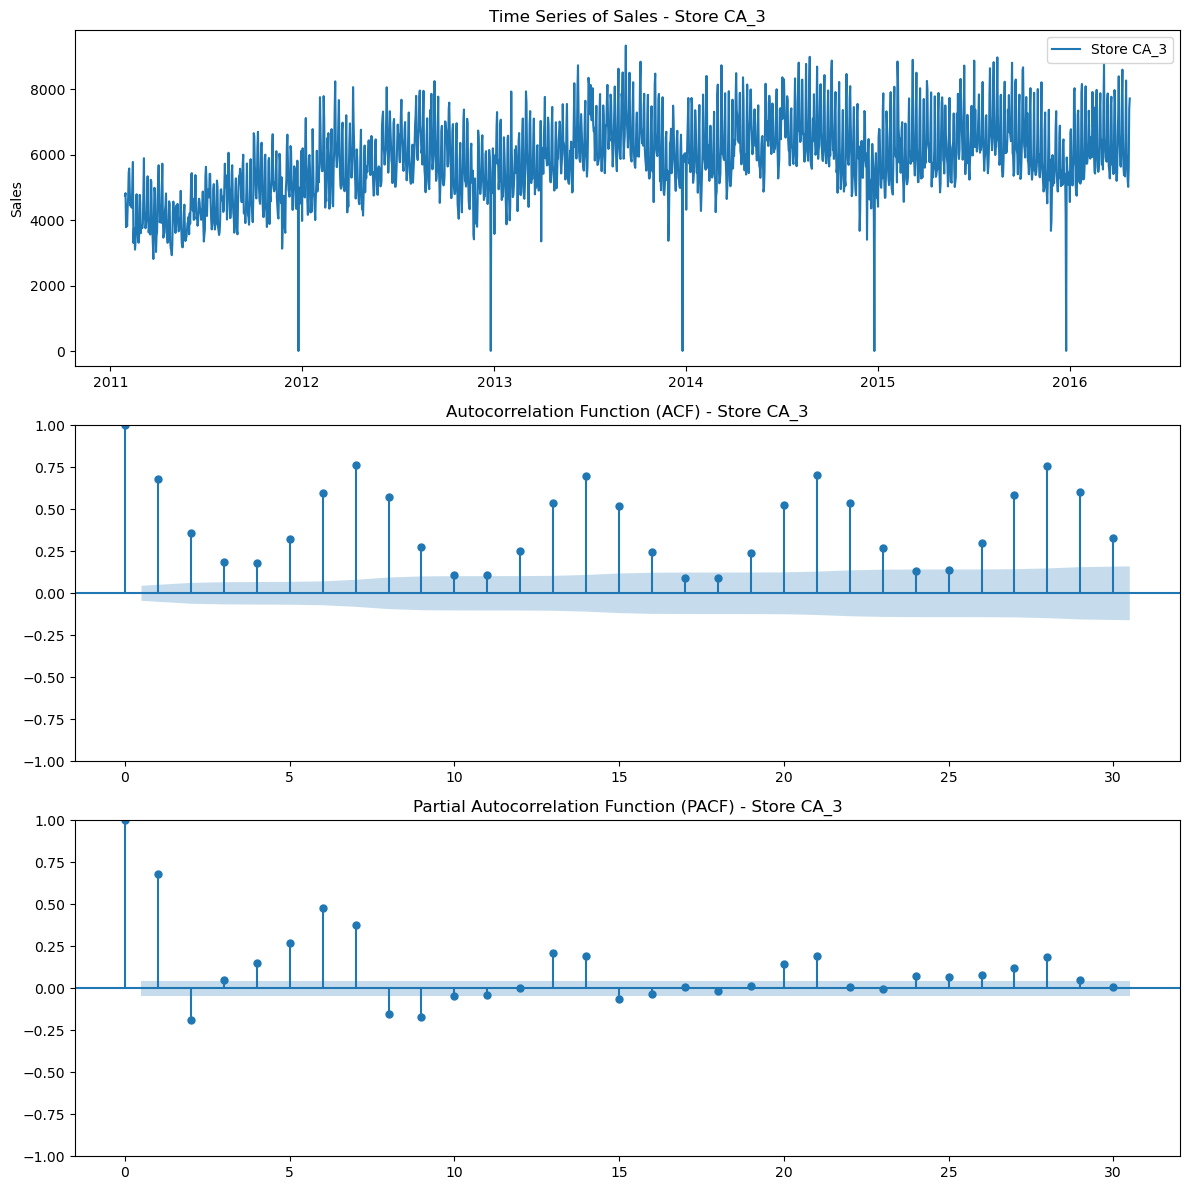

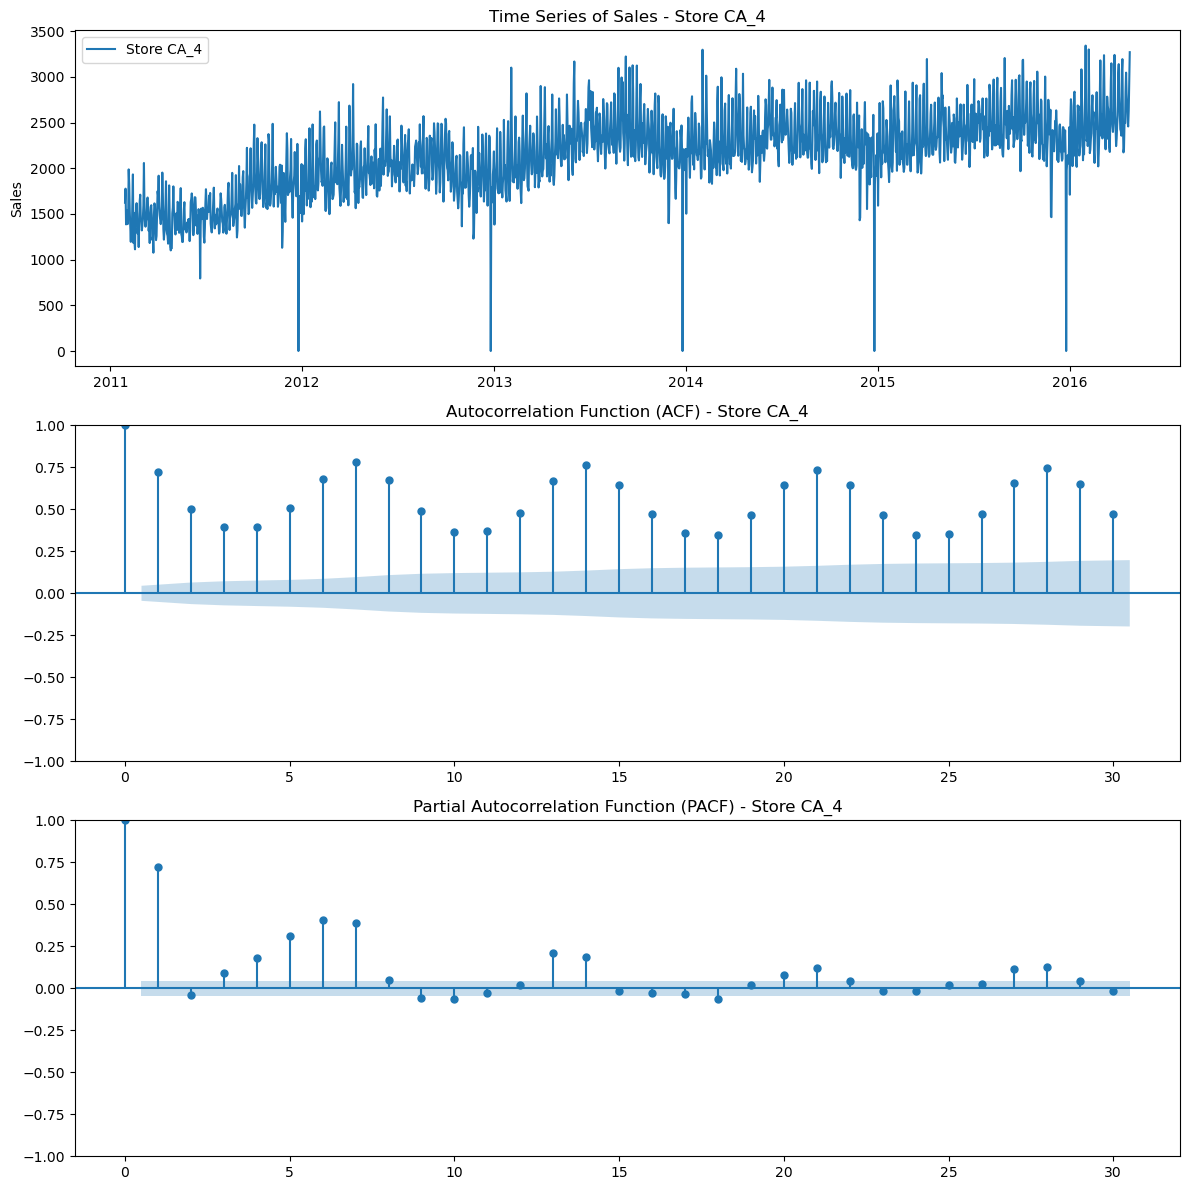

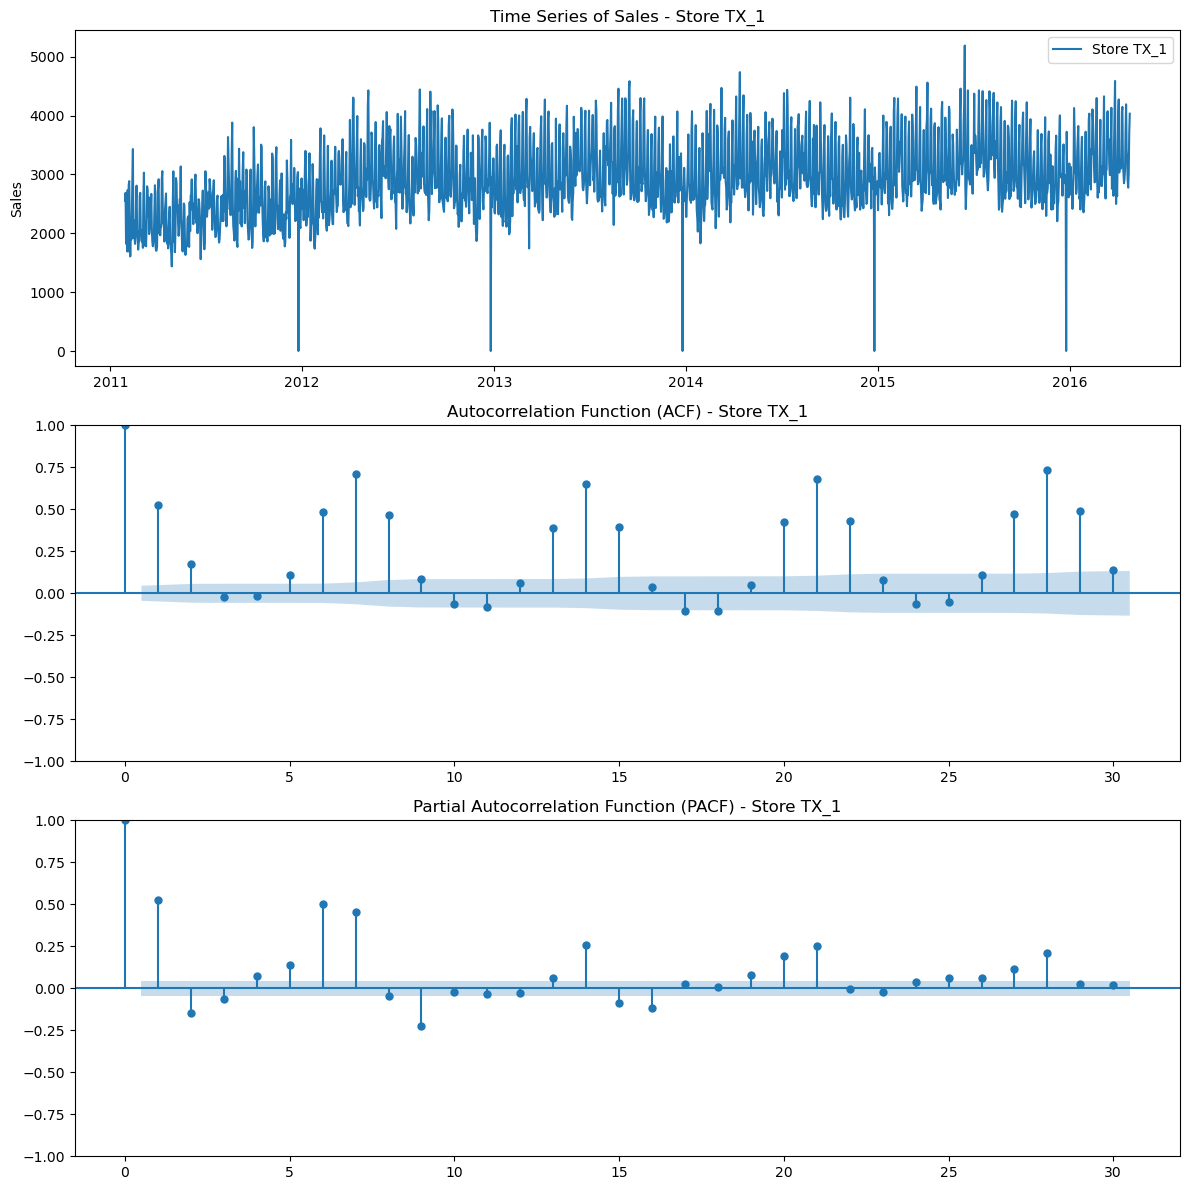

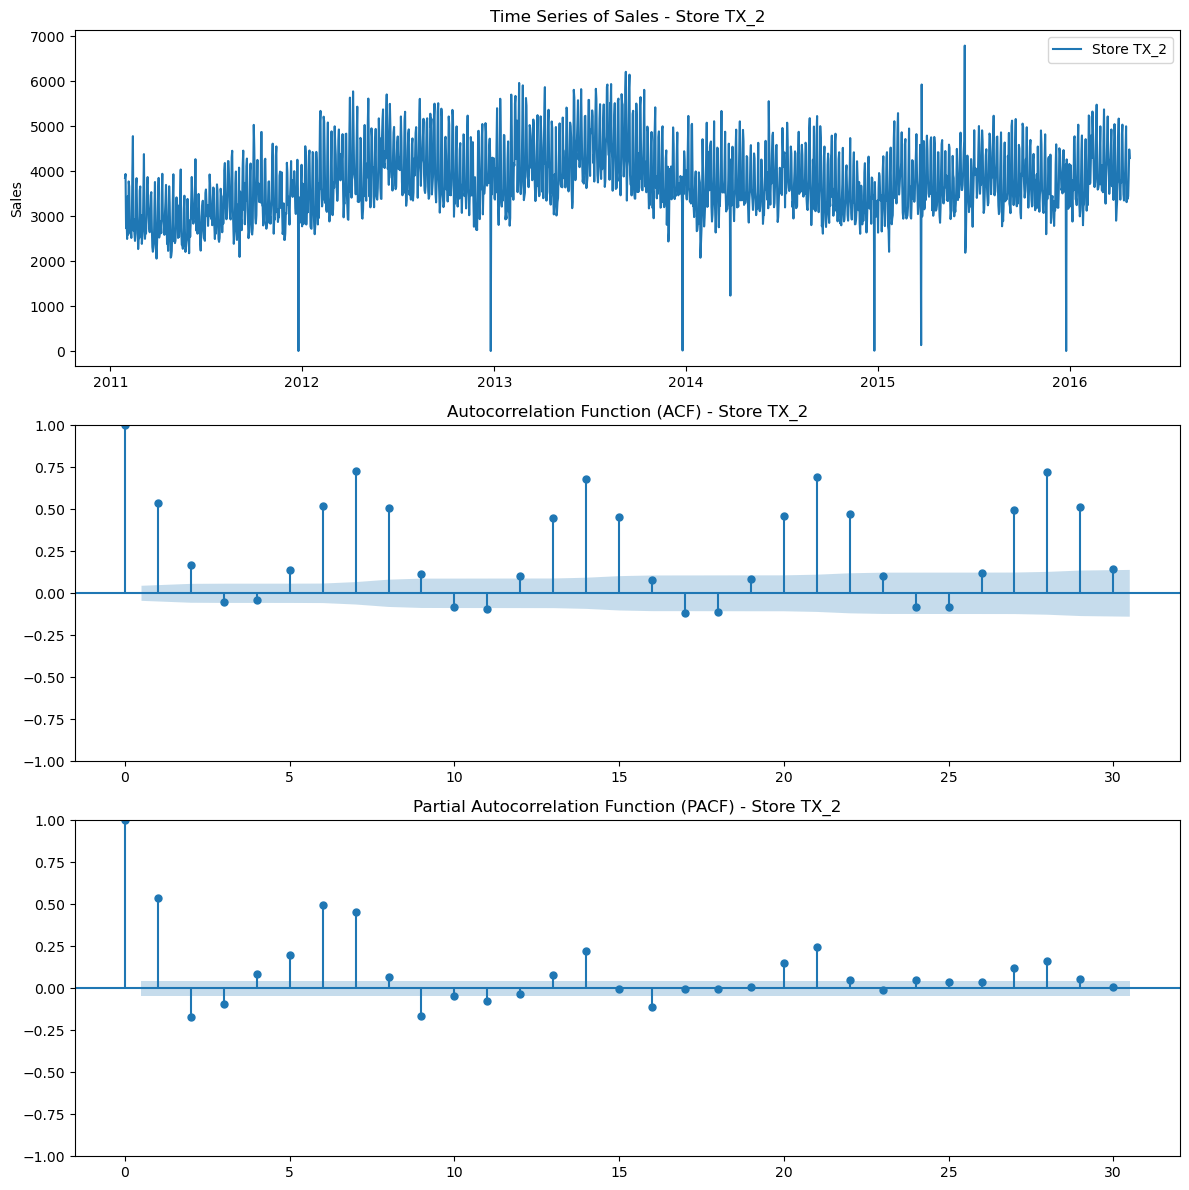

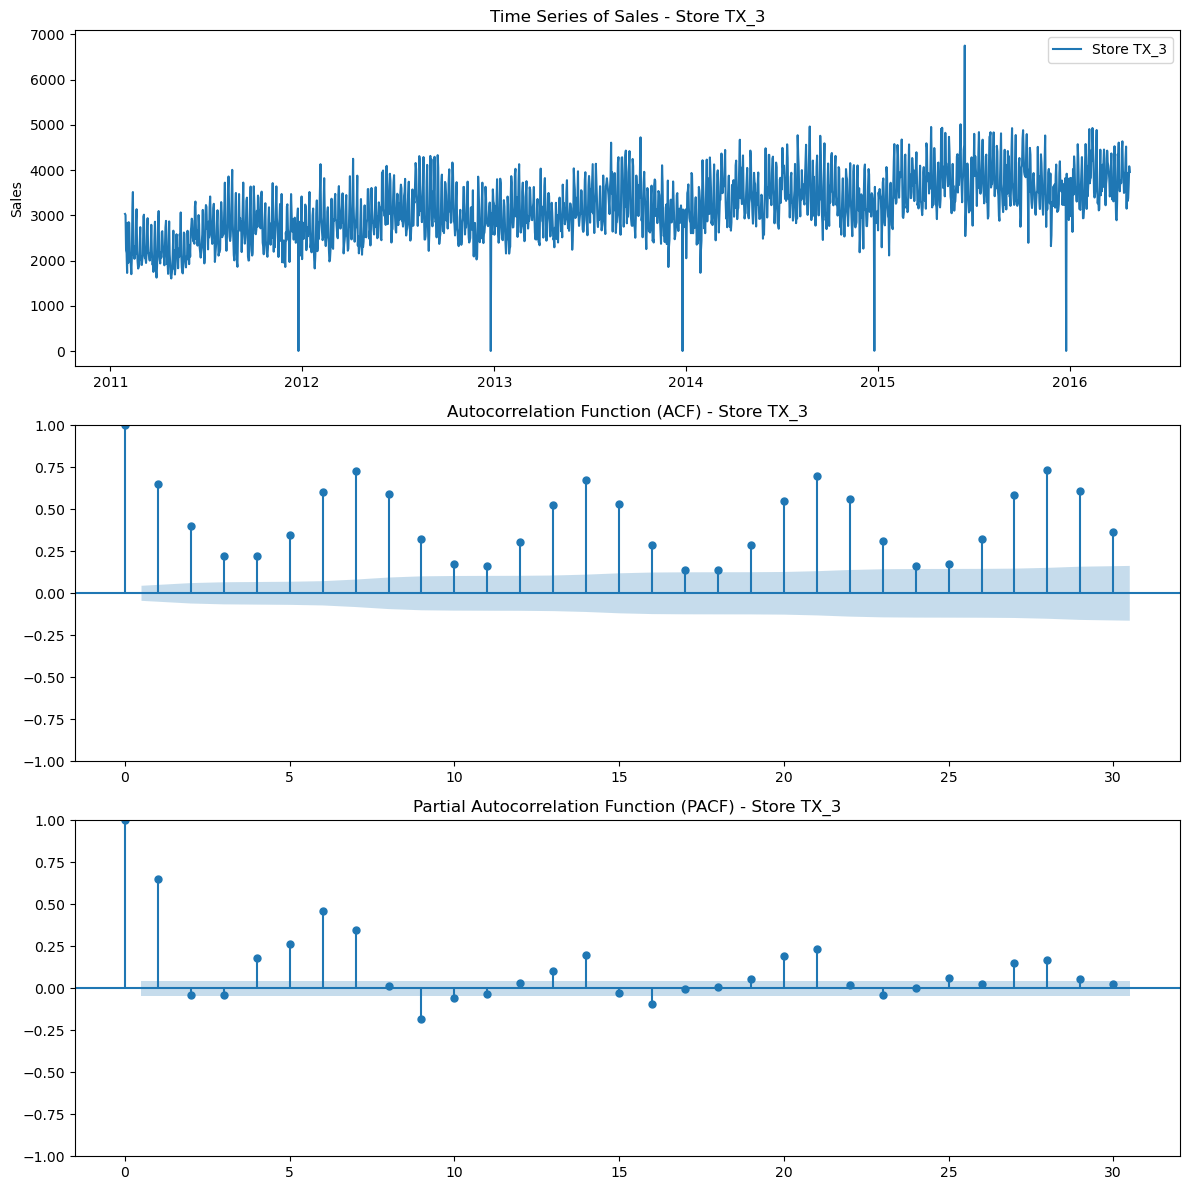

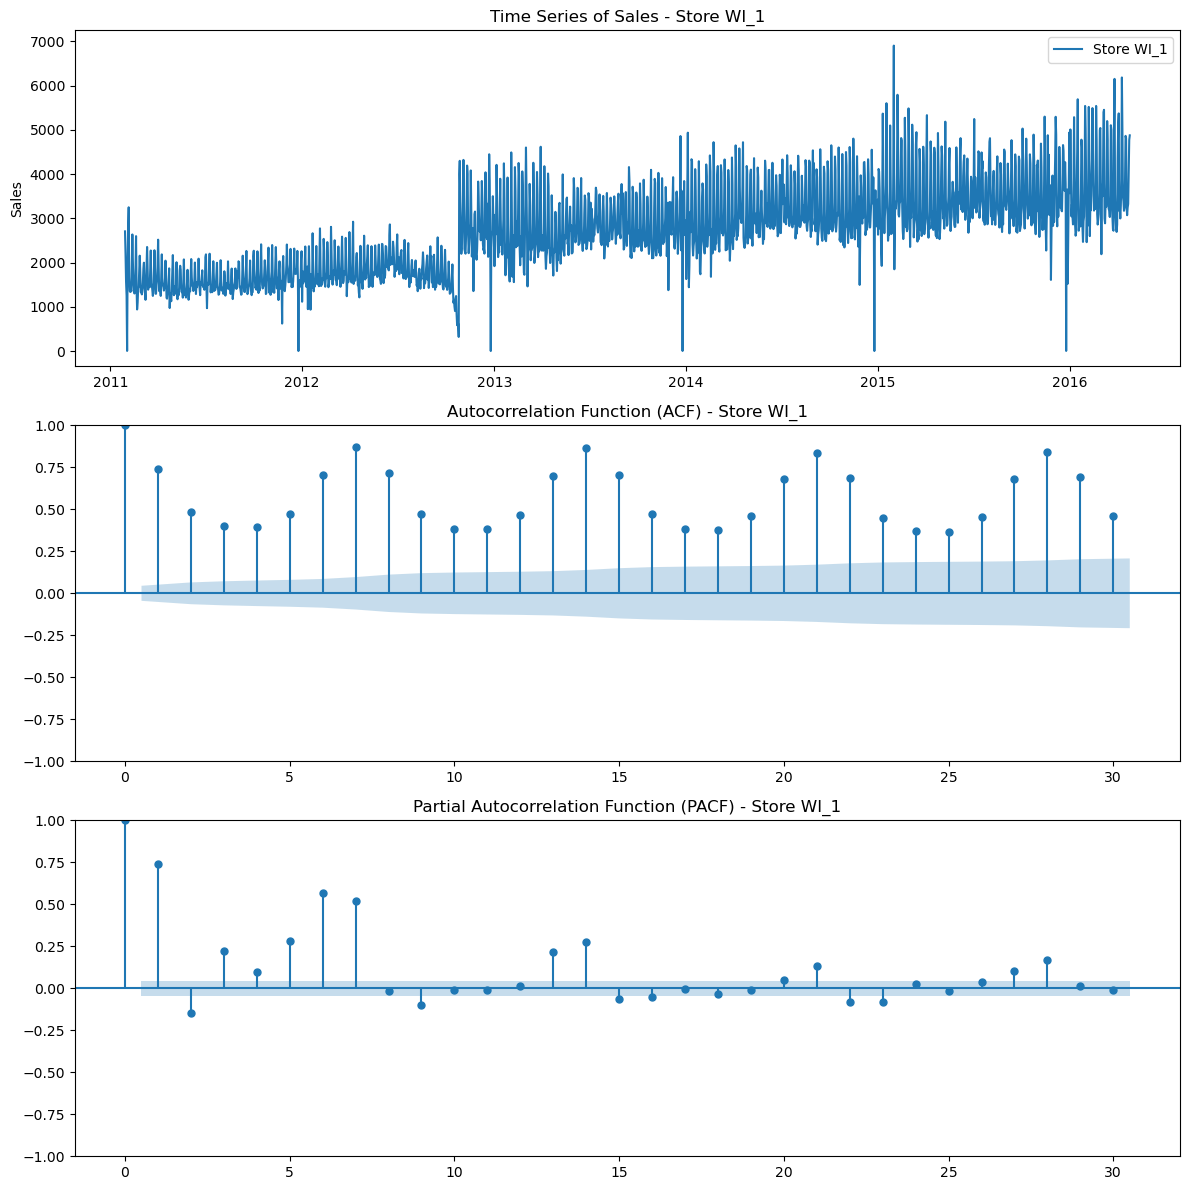

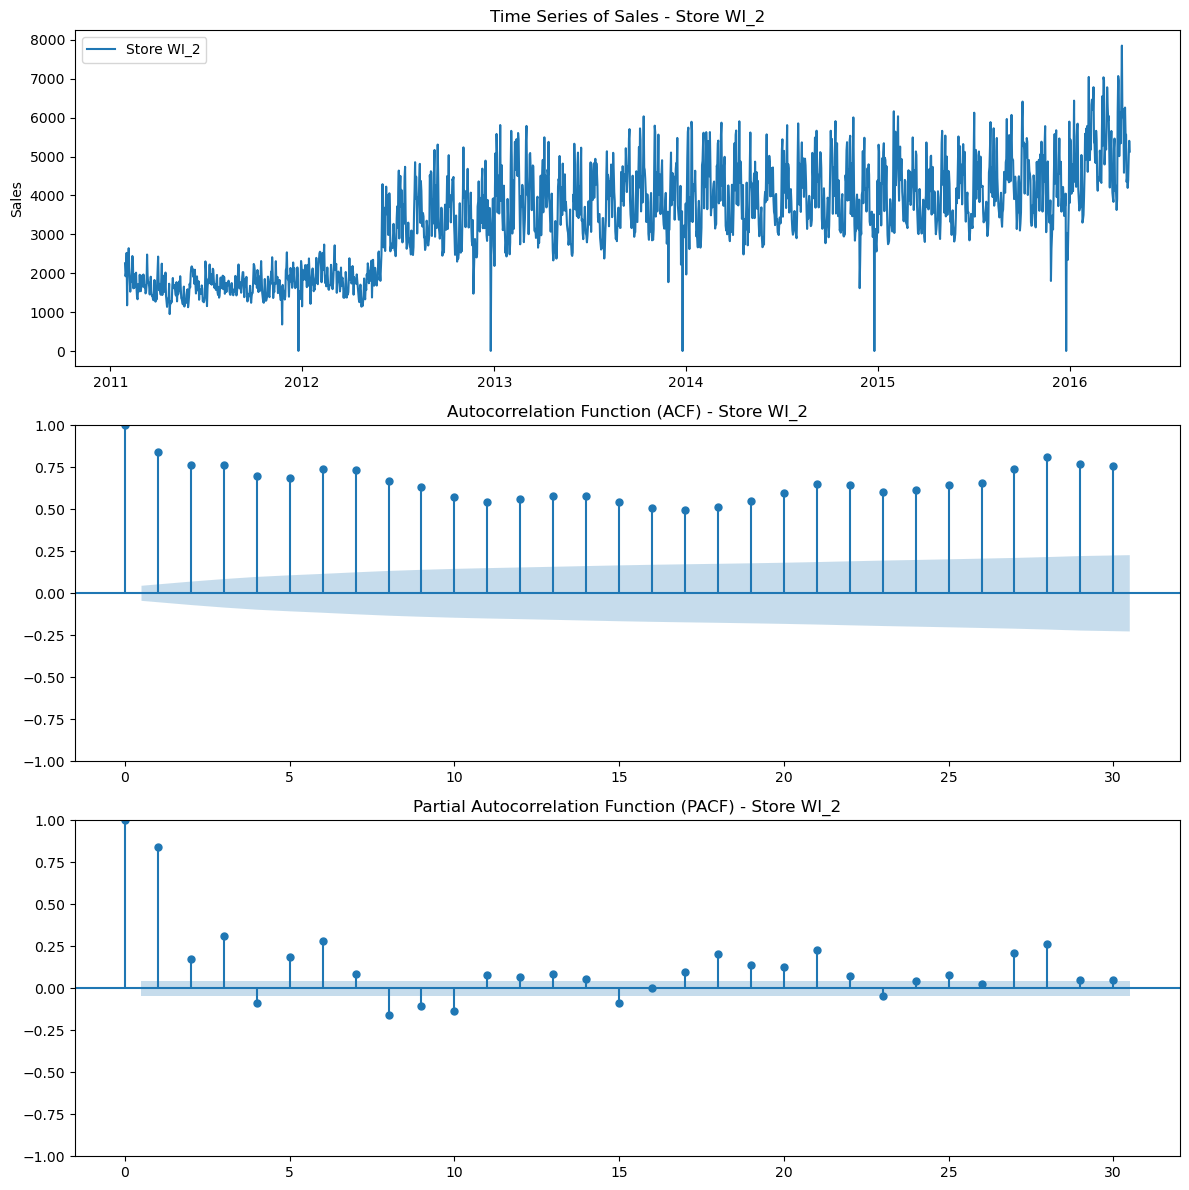

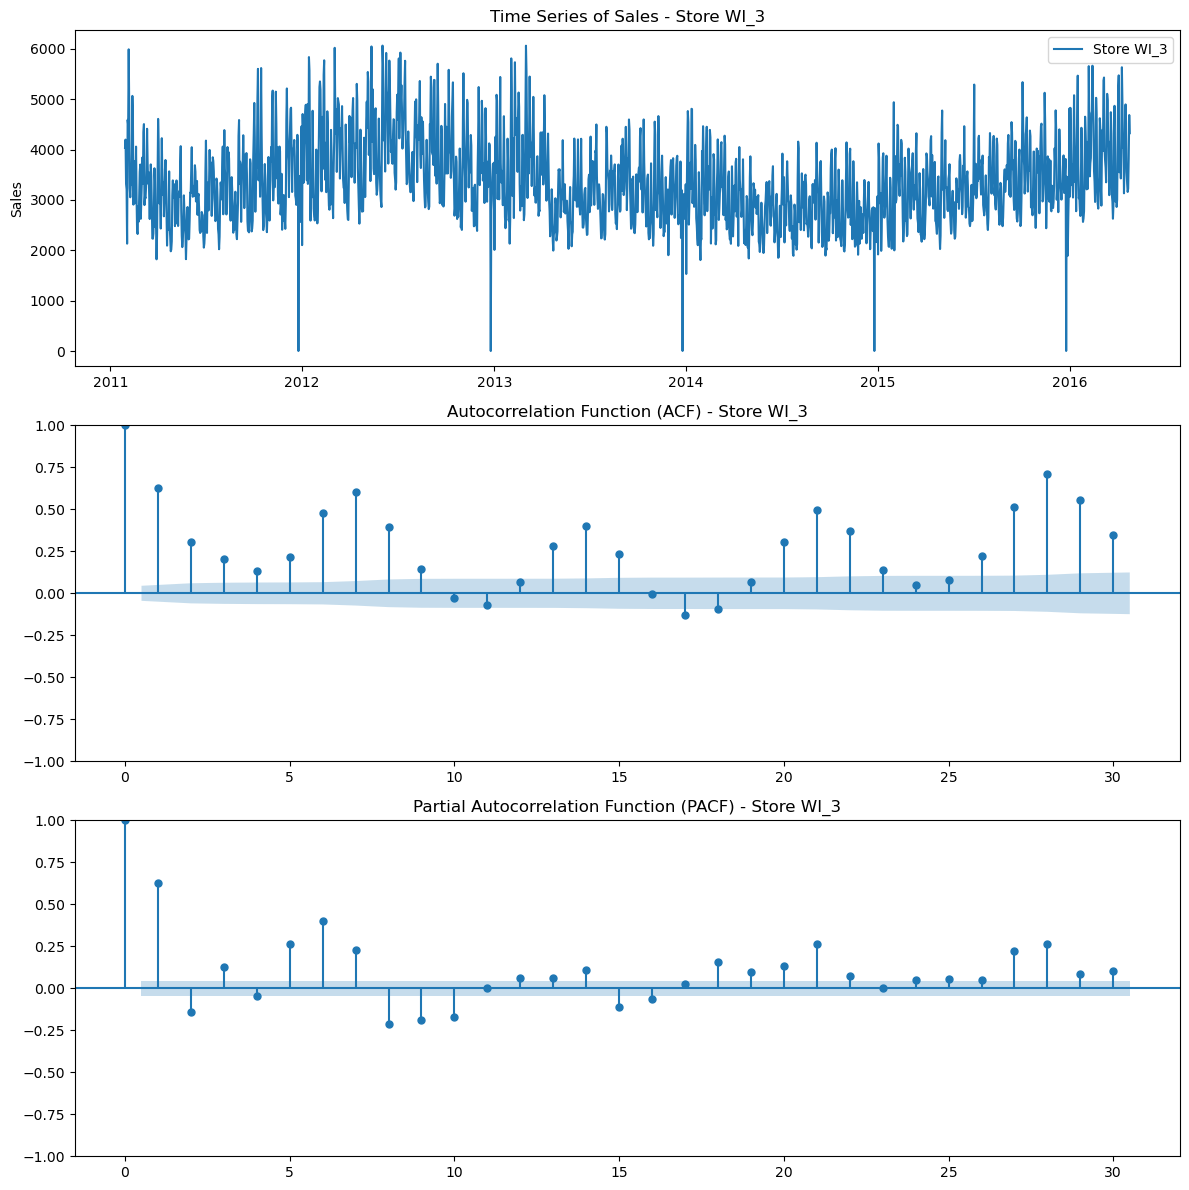

In [39]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Ensure date is a datetime index
df_s['date'] = pd.to_datetime(df_s['date'])
df_s = df_s.set_index('date')

# Get unique stores
unique_stores = df_s['store_id'].unique()

# Plot time series, ACF, and PACF for each store
for store in unique_stores:
    store_data = df_s[df_s['store_id'] == store]['sold']
    
    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    # Time Series Plot
    axes[0].plot(store_data, label=f"Store {store}")
    axes[0].set_title(f"Time Series of Sales - Store {store}")
    axes[0].set_ylabel("Sales")
    axes[0].legend()

    # ACF Plot
    sm.graphics.tsa.plot_acf(store_data, lags=30, ax=axes[1])
    axes[1].set_title(f"Autocorrelation Function (ACF) - Store {store}")

    # PACF Plot
    sm.graphics.tsa.plot_pacf(store_data, lags=30, ax=axes[2])
    axes[2].set_title(f"Partial Autocorrelation Function (PACF) - Store {store}")

    plt.tight_layout()
    plt.show()

| Store  | Trend            | Seasonality | Drastic Increase in Sales?      | ACF/PACF Insights           | Suggested Model         |
|--------|-----------------|-------------|---------------------------------|-----------------------------|-------------------------|
| **CA_1** | Slight increase  | Weekly      | ❌ No drastic change            | Lag 1, 7 significant        | SARIMA(1,1,1)(1,1,1,7)  |
| **CA_2** | Stronger trend  | Weekly      | ✅ Increase around 2015         | AR(1), AR(7) significant    | SARIMA(1,1,1)(1,1,1,7)  |
| **CA_3** | High variance   | Weekly      | ✅ Increase around 2014-2015    | Strong AR at lag 1, 7       | SARIMA(1,1,1)(1,1,1,7)  |
| **TX_1** | Upward trend    | Weekly      | ❌ No drastic change            | Seasonal effects at 7, 14   | SARIMA(1,1,1)(1,1,1,7)  |
| **TX_2** | More volatile   | Weekly      | ✅ Increase in late 2014        | Strong lag 1, 7             | SARIMA(1,1,1)(1,1,1,7)  |
| **TX_3** | Upward trend    | Weekly      | ❌ No drastic change            | AR at 1, 7                  | SARIMA(1,1,1)(1,1,1,7)  |
| **WI_1** | Seasonality     | Weekly      | ✅ Increase in mid-2013         | AR at lag 1, 7              | SARIMA(1,1,1)(1,1,1,7)  |
| **WI_2** | Stronger trend  | Weekly      | ✅ Big jump in 2013             | Weekly seasonality          | SARIMA(1,1,1)(1,1,1,7)  |
| **WI_3** | More variability | Weekly     | ✅ Noticeable rise after 2014   | AR effects at 1, 7          | SARIMA(1,1,1)(1,1,1,7)  |


Suggested Model: SARIMA(1,1,1)(1,1,1,7)

The first part (1,1,1) handles the overall trend:
+ AR(1) → Uses past 1 value
+ Differencing (1) → Removes trend
+ MA(1) → Uses past 1 error

The seasonal part (1,1,1,7) handles the weekly pattern:
+ SAR(1) → Uses data from 7 days ago to predict current value
+ Seasonal differencing (D=1) → Removes weekly seasonality
+ SMA(1) → Uses past seasonal errors to correct predictions

### Tests

#### Augmented Dickey-Fuller (ADF) Test: Check stationarity

In [44]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df, store_col='store_id', sales_col='sold'):
    stores = df[store_col].unique()
    results = {}

    for store in stores:
        series = df[df[store_col] == store][sales_col]
        result = adfuller(series.dropna())
        results[store] = {
            'ADF Statistic': result[0],
            'p-value': result[1]
        }
    
    return results

# Run ADF Test for all stores
adf_results = adf_test(df_s)
for store, res in adf_results.items():
    print(f"Store: {store} | ADF Statistic: {res['ADF Statistic']:.4f} | p-value: {res['p-value']:.4f}")

Store: CA_1 | ADF Statistic: -2.0354 | p-value: 0.2713
Store: CA_2 | ADF Statistic: -0.5401 | p-value: 0.8839
Store: CA_3 | ADF Statistic: -2.3972 | p-value: 0.1425
Store: CA_4 | ADF Statistic: -1.7876 | p-value: 0.3867
Store: TX_1 | ADF Statistic: -2.6930 | p-value: 0.0753
Store: TX_2 | ADF Statistic: -2.5537 | p-value: 0.1029
Store: TX_3 | ADF Statistic: -2.0580 | p-value: 0.2617
Store: WI_1 | ADF Statistic: -1.2355 | p-value: 0.6581
Store: WI_2 | ADF Statistic: -0.9850 | p-value: 0.7587
Store: WI_3 | ADF Statistic: -2.2132 | p-value: 0.2015


All p-values are all larger than 0.05, applying differencing (d=1).

#### Seasonal Decomposition: Confirm seasonality

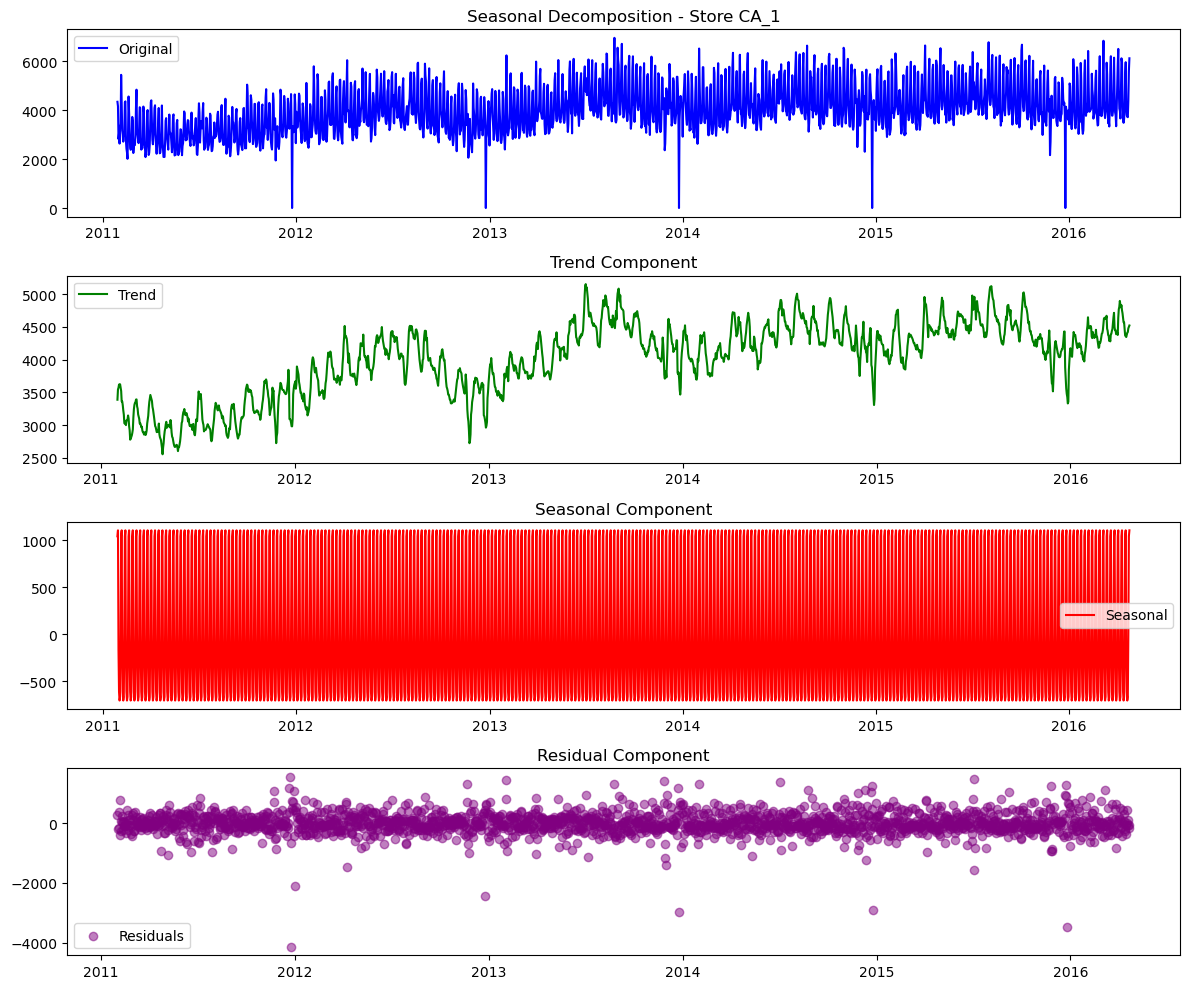

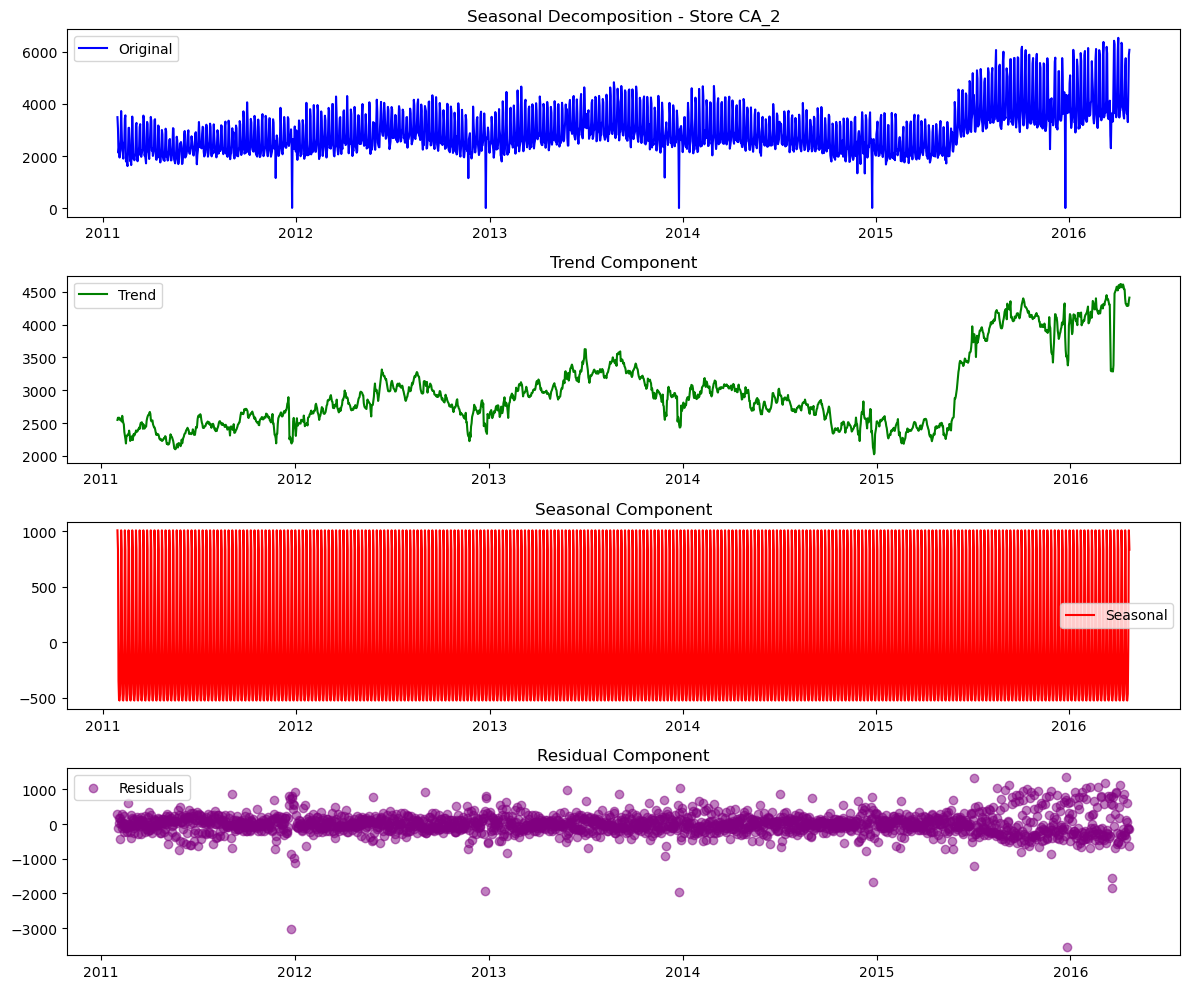

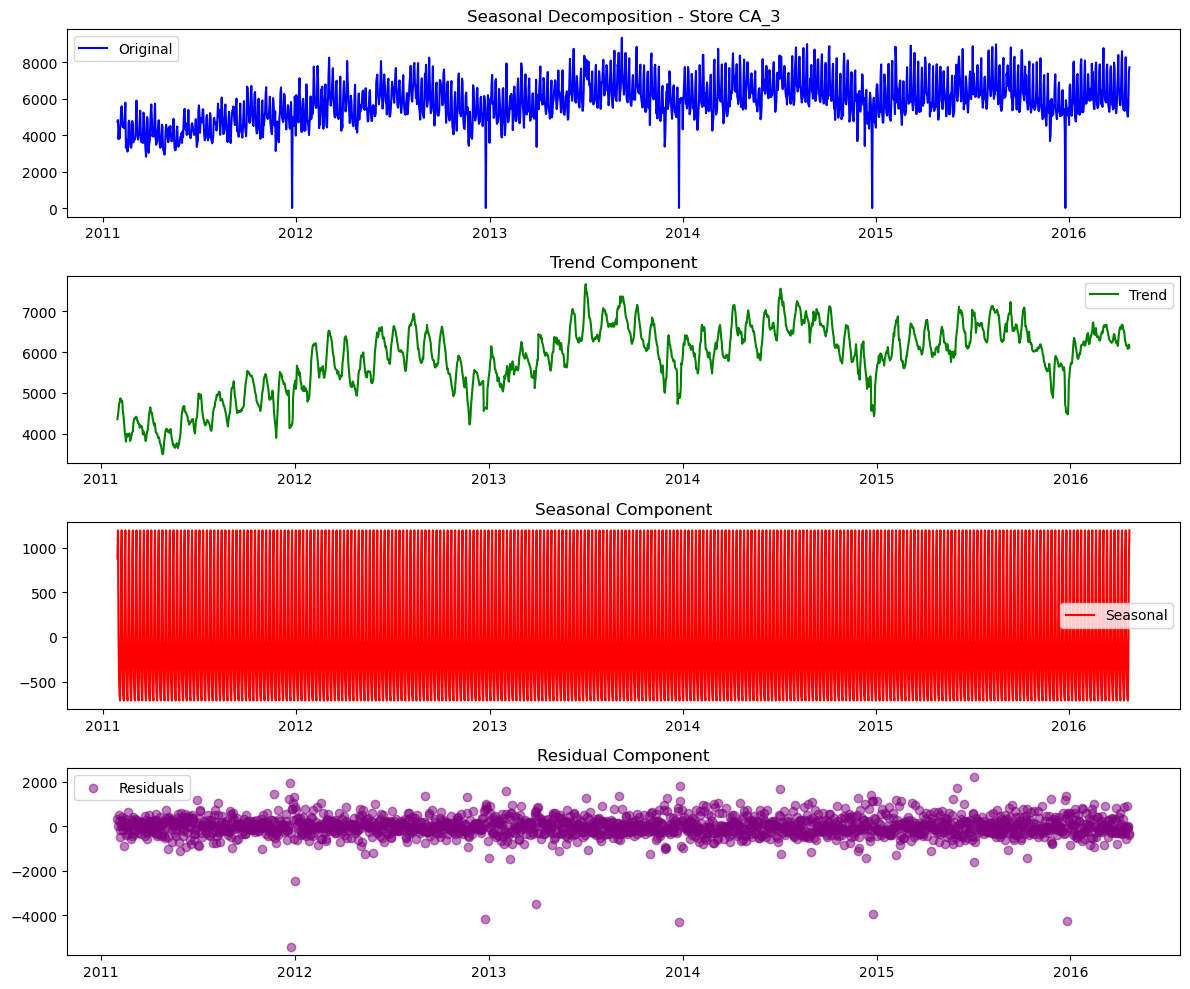

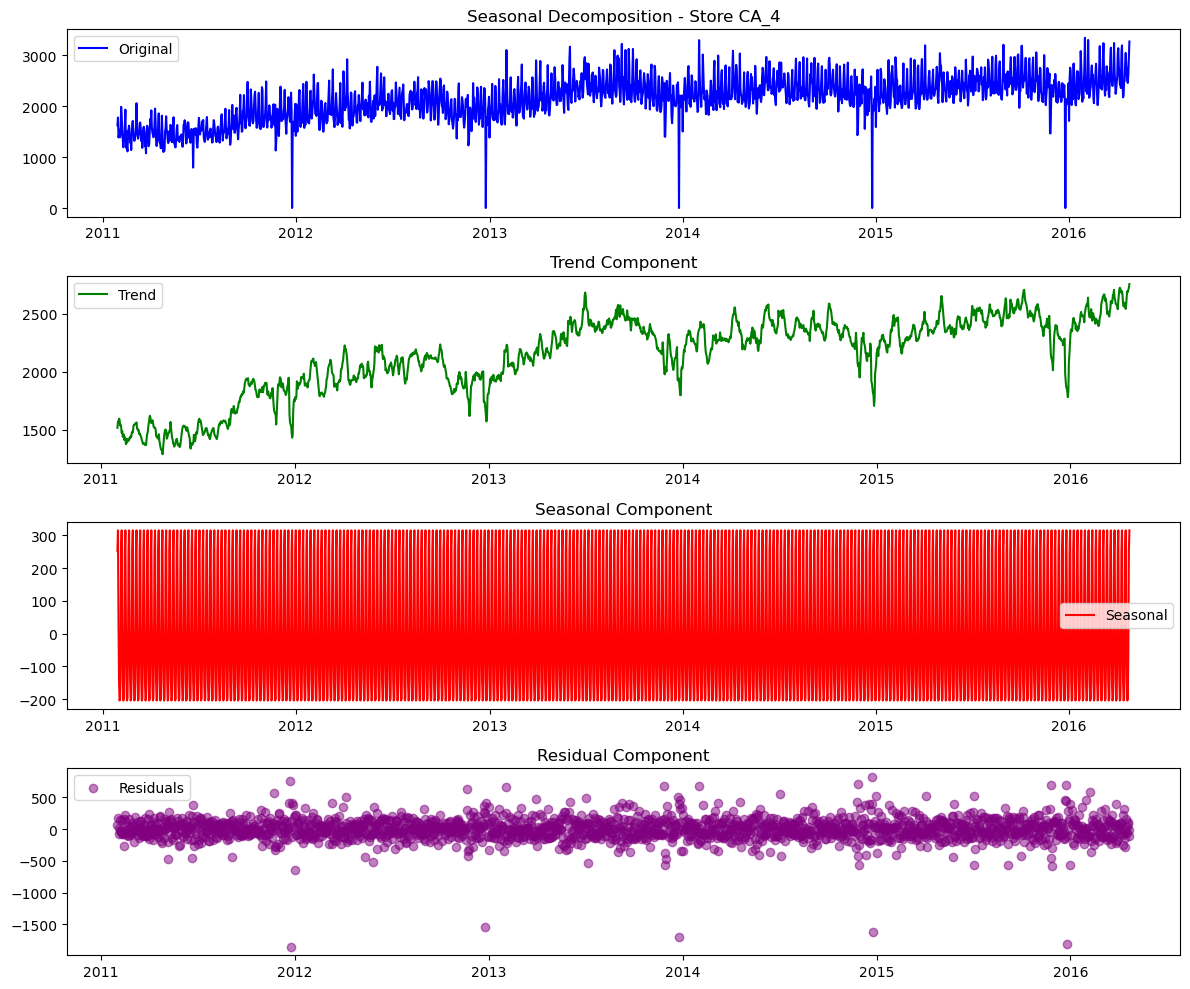

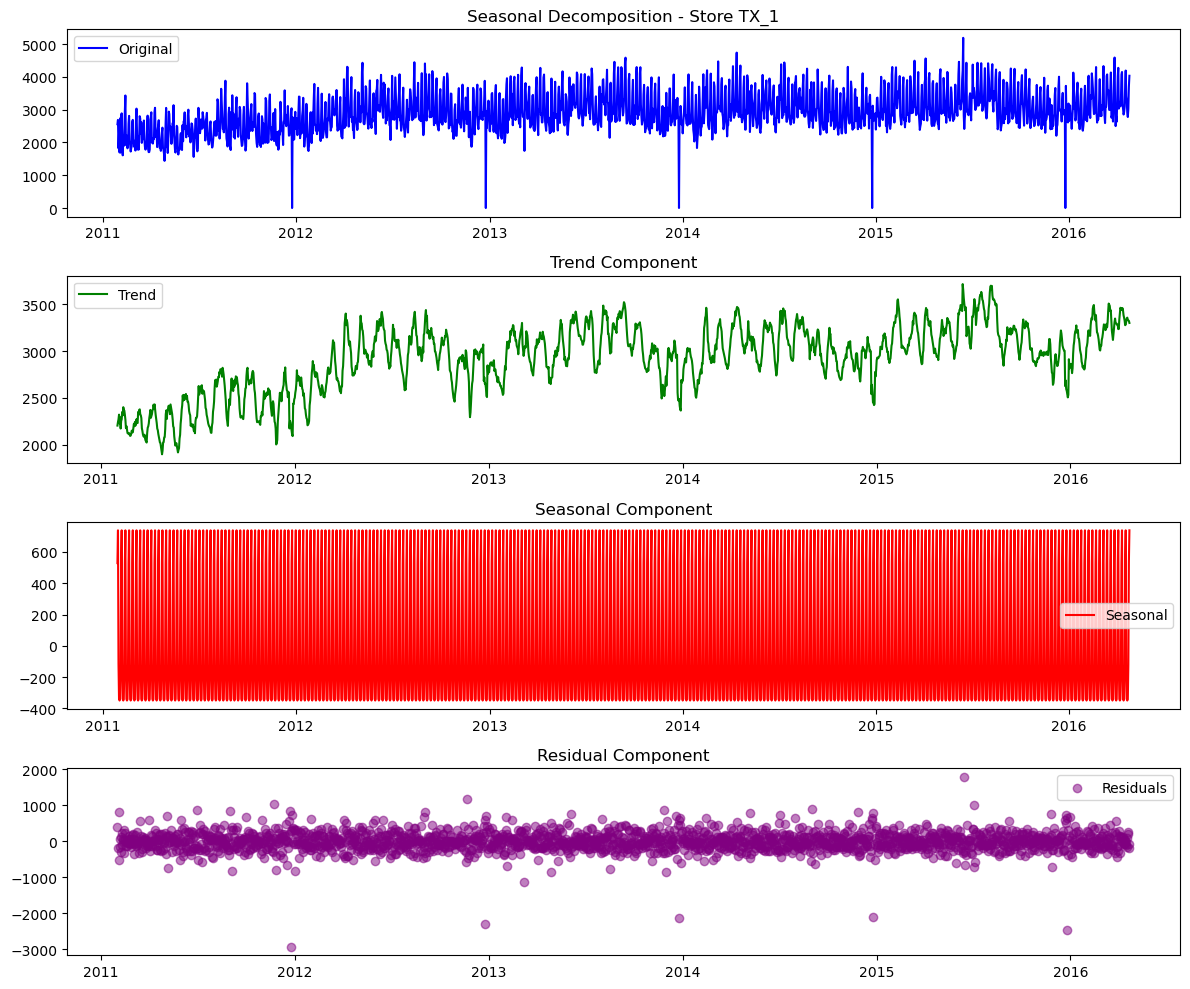

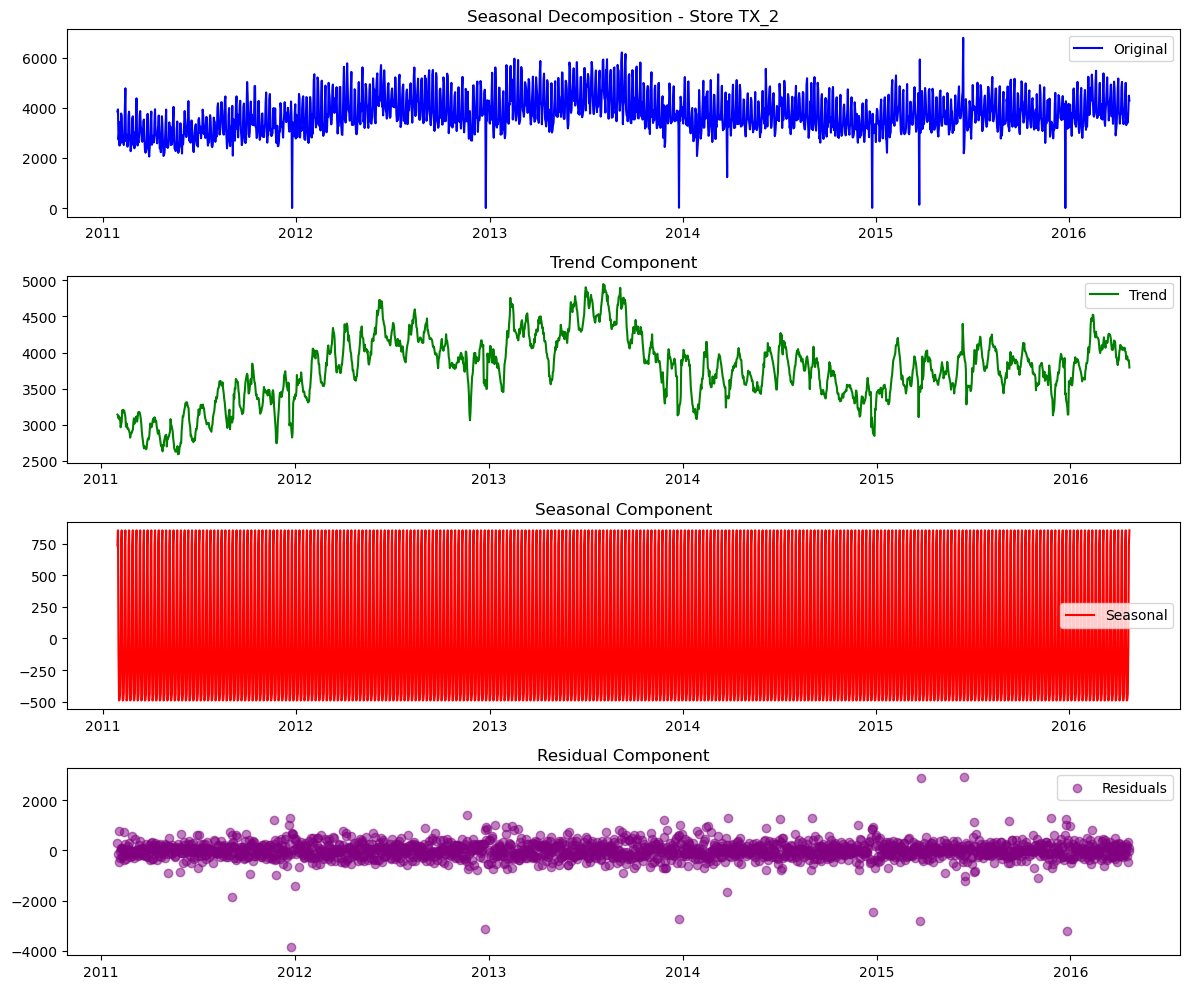

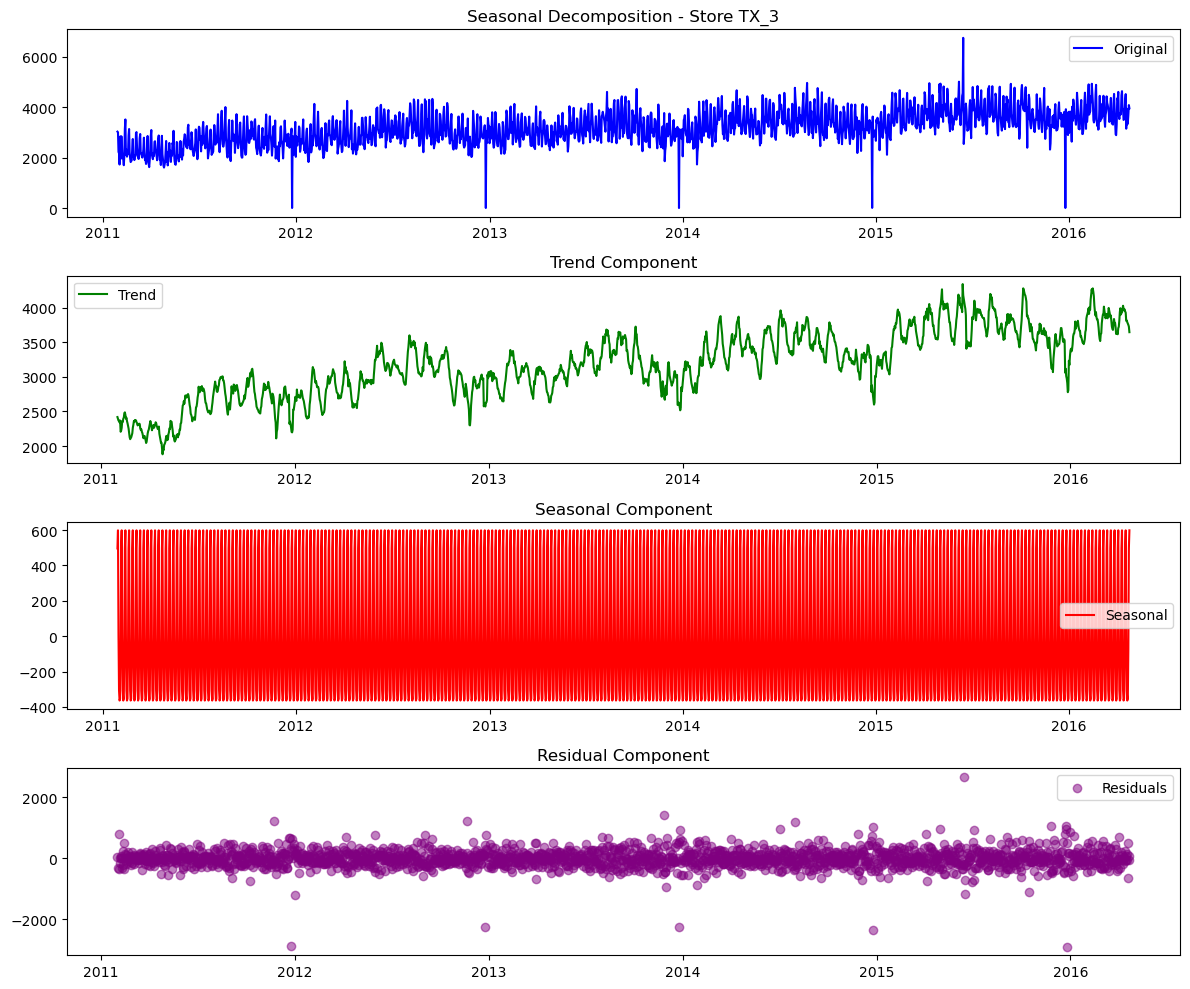

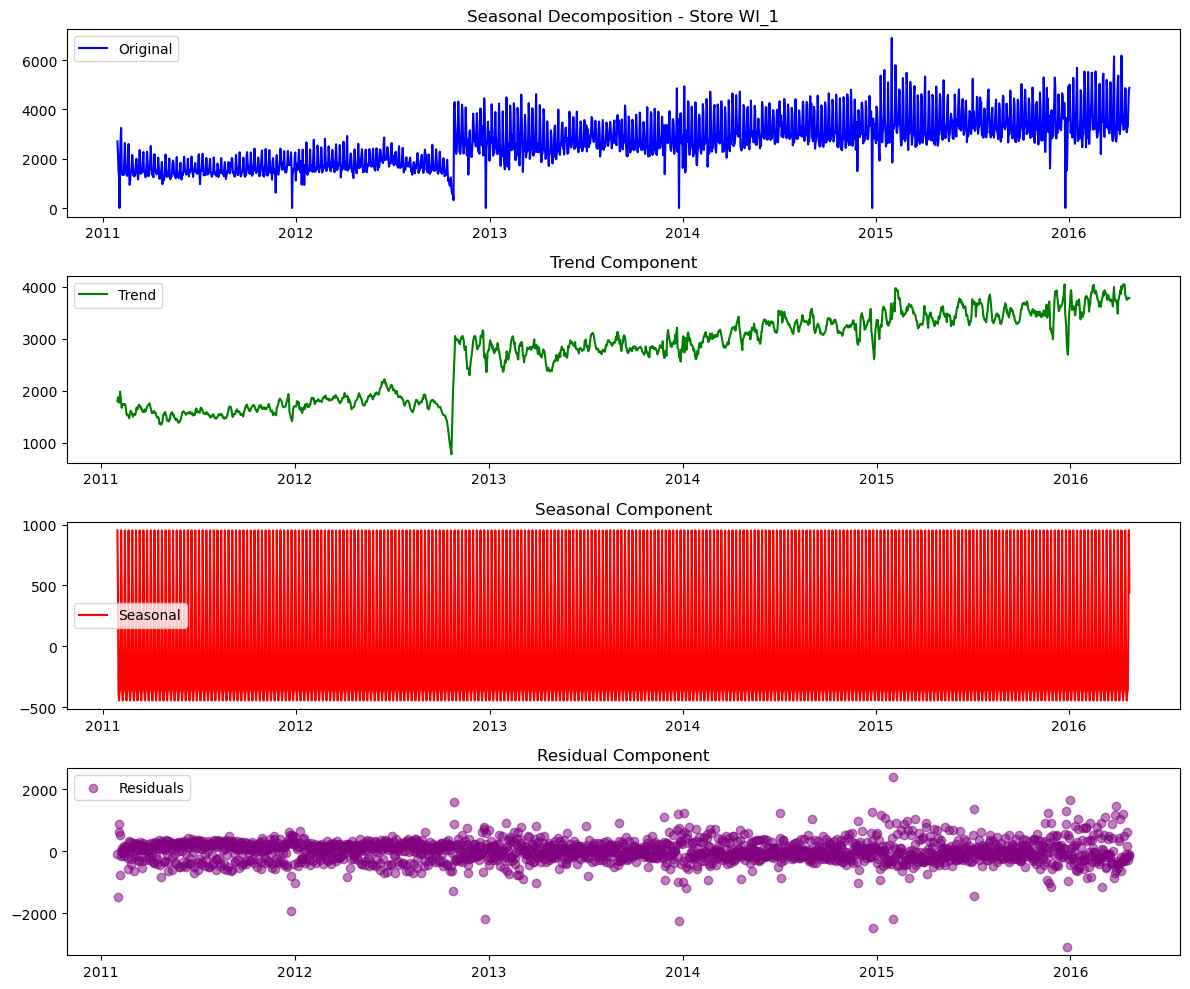

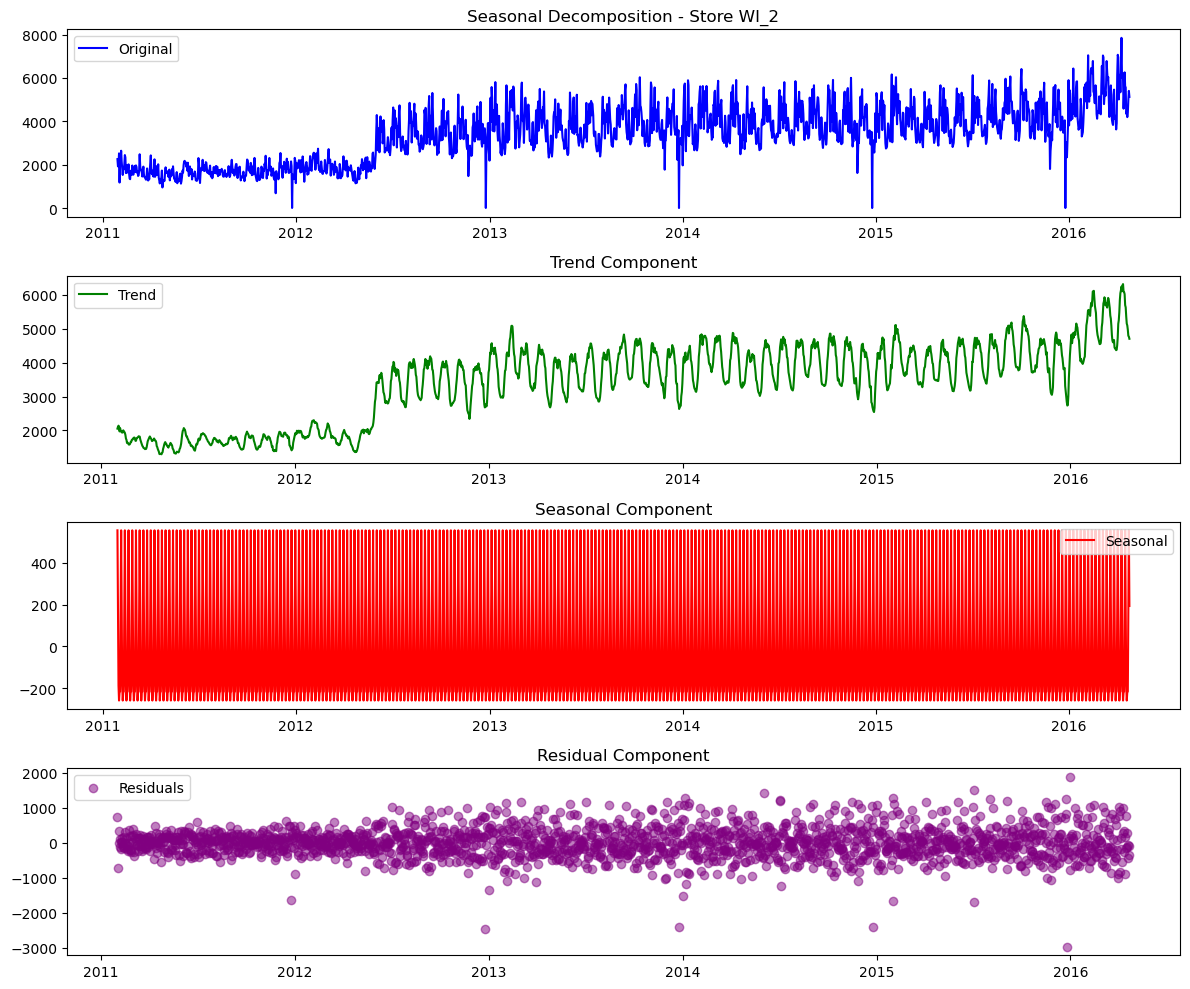

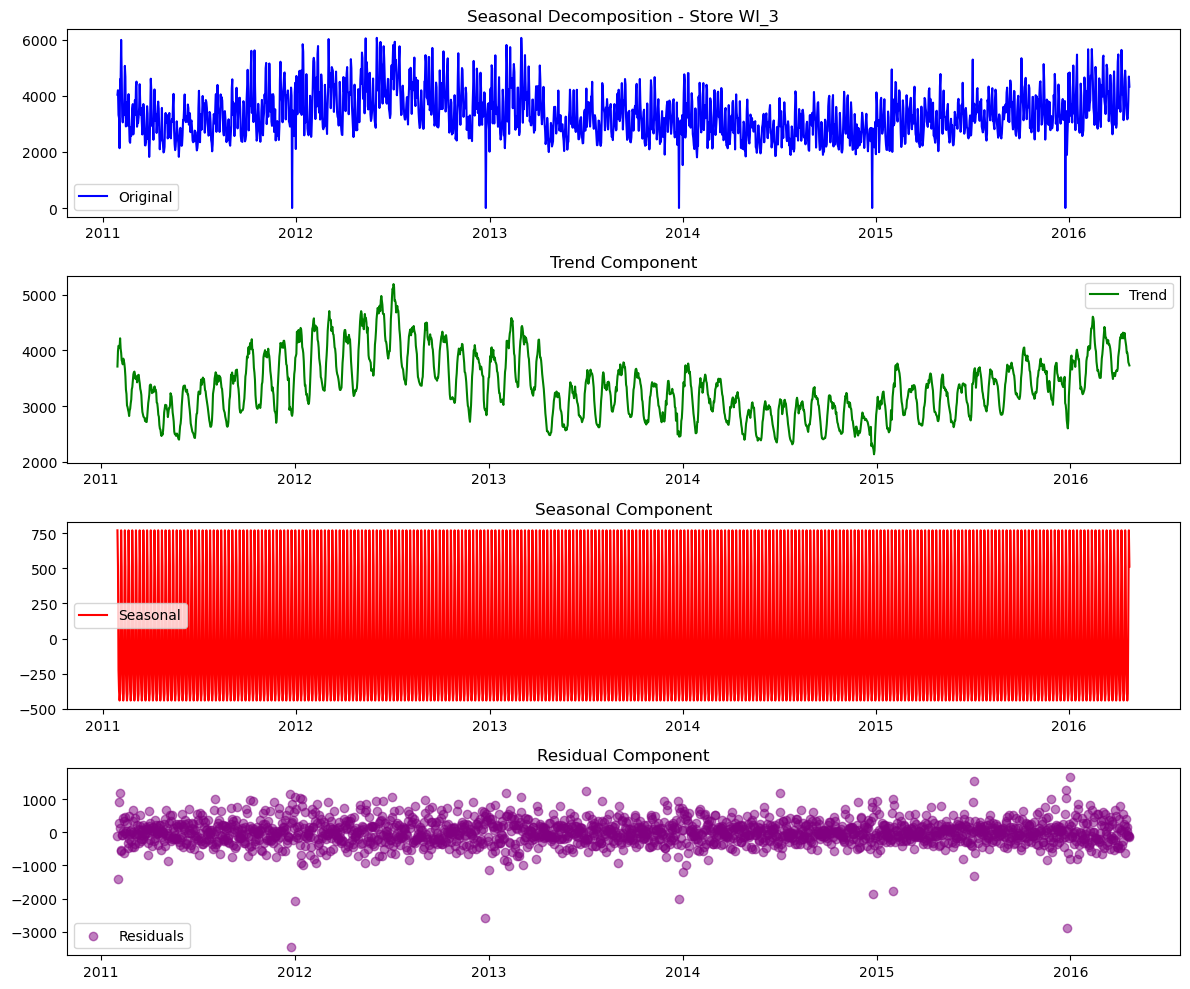

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def seasonal_decomposition_fixed(df, store_col='store_id', sales_col='sold', period=7):
    stores = df[store_col].unique()

    for store in stores:
        series = df[df[store_col] == store][sales_col].dropna()
        
        # Perform seasonal decomposition (additive since data has zeros)
        decomposition = seasonal_decompose(series, period=period, model='additive')

        # Create a larger figure for better visualization
        fig, axes = plt.subplots(4, 1, figsize=(12, 10))  # Bigger size for clarity

        # Plot original series
        axes[0].plot(series, label='Original', color='blue')
        axes[0].set_title(f"Seasonal Decomposition - Store {store}")
        axes[0].legend()

        # Plot trend component
        axes[1].plot(decomposition.trend, label='Trend', color='green')
        axes[1].set_title("Trend Component")
        axes[1].legend()

        # Plot seasonal component with better scaling
        axes[2].plot(decomposition.seasonal, label='Seasonal', color='red')
        axes[2].set_title("Seasonal Component")
        axes[2].legend()

        # Plot residual component
        axes[3].scatter(series.index, decomposition.resid, label='Residuals', color='purple', alpha=0.5)
        axes[3].set_title("Residual Component")
        axes[3].legend()

        plt.tight_layout()
        plt.show()

# Run for all stores
seasonal_decomposition_fixed(df_s)

#### Ljung-Box Test: Residual Autocorrelation

In [49]:
from statsmodels.stats.diagnostic import acorr_ljungbox

def ljung_box_test(df, store_col='store_id', sales_col='sold', lags=10):
    stores = df[store_col].unique()
    results = {}

    for store in stores:
        series = df[df[store_col] == store][sales_col].dropna()
        test_result = acorr_ljungbox(series, lags=[lags], return_df=True)
        results[store] = test_result['lb_pvalue'].values[0]

    return results

# Run Ljung-Box Test for all stores
ljung_results = ljung_box_test(df_s)

for store, p_value in ljung_results.items():
    print(f"Store: {store} | Ljung-Box p-value: {p_value:.4f}")

Store: CA_1 | Ljung-Box p-value: 0.0000
Store: CA_2 | Ljung-Box p-value: 0.0000
Store: CA_3 | Ljung-Box p-value: 0.0000
Store: CA_4 | Ljung-Box p-value: 0.0000
Store: TX_1 | Ljung-Box p-value: 0.0000
Store: TX_2 | Ljung-Box p-value: 0.0000
Store: TX_3 | Ljung-Box p-value: 0.0000
Store: WI_1 | Ljung-Box p-value: 0.0000
Store: WI_2 | Ljung-Box p-value: 0.0000
Store: WI_3 | Ljung-Box p-value: 0.0000


All p-value > 0.05, residuals are random (good).

### Correlation

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
cat_cols = ['weekday', 'd', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
df_no_store_id = df_s.drop(columns=['store_id'])

# Apply one-hot encoding
df_encoded = pd.get_dummies((df_no_store_id), columns=cat_cols, drop_first=True)

# Show new dataframe structure
print(df_encoded.dtypes)

sold                           int16
wm_yr_wk                       int16
wday                            int8
month                           int8
year                           int16
                               ...  
event_type_1_Sporting           bool
event_name_2_Easter             bool
event_name_2_Father's day       bool
event_name_2_OrthodoxEaster     bool
event_type_2_Religious          bool
Length: 2019, dtype: object


In [59]:
# Compute Correlation with 'sold' (Sales)
corr_with_sold = df_encoded.corrwith(df_encoded['sold']).abs().sort_values(ascending=False)

# Print execution time
print(corr_with_sold)
print("\n🔹 Top 20 Features Most Correlated with Sales:")
print(corr_with_sold.head(20))

sold                1.000000
wm_yr_wk            0.302395
year                0.296907
wday                0.254031
weekday_Saturday    0.224258
                      ...   
d_d_1965                 NaN
d_d_1966                 NaN
d_d_1967                 NaN
d_d_1968                 NaN
d_d_1969                 NaN
Length: 2019, dtype: float64

🔹 Top 20 Features Most Correlated with Sales:
sold                      1.000000
wm_yr_wk                  0.302395
year                      0.296907
wday                      0.254031
weekday_Saturday          0.224258
weekday_Sunday            0.211283
weekday_Wednesday         0.134527
event_name_1_Christmas    0.133760
weekday_Thursday          0.128471
weekday_Tuesday           0.123385
snap_WI                   0.119692
snap_TX                   0.117163
snap_CA                   0.101358
sell_price                0.095510
event_type_1_National     0.061517
d_d_697                   0.059765
d_d_331                   0.059761
d_d_1792  

In [61]:
# Select Features with Correlation > 0.1
selected_exog_vars = corr_with_sold[corr_with_sold > 0.1].index.tolist()

# Ensure 'sold' is not included in the list
selected_exog_vars = [var for var in selected_exog_vars if var != 'sold']

print("Selected Exogenous Variables for SARIMAX:", selected_exog_vars)
print("Number of Selected Exogenous Variables for SARIMAX:", len(selected_exog_vars))

Selected Exogenous Variables for SARIMAX: ['wm_yr_wk', 'year', 'wday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Wednesday', 'event_name_1_Christmas', 'weekday_Thursday', 'weekday_Tuesday', 'snap_WI', 'snap_TX', 'snap_CA']
Number of Selected Exogenous Variables for SARIMAX: 12


In [63]:
exog_vars = ['wm_yr_wk', 'year', 'wday', 'event_name_1_Christmas', 'snap_WI', 'snap_TX', 'snap_CA', 'sell_price']

## Models

### Split Data into Train & Test Sets

In [65]:
import numpy as np
import pandas as pd

# Ensure 'store_id' is present and remains categorical
df_encoded['store_id'] = df_s['store_id']  # Re-add as non-encoded category

print(df_encoded['store_id'].head())

# Train-Test Split Function
def train_test_split(df, store_col='store_id', sales_col='sold', split_ratio=0.8):
    stores = df[store_col].unique()  # Unique store identifiers
    train_test_data = {}

    for store in stores:
        store_data = df[df[store_col] == store].sort_values(by="wm_yr_wk")
        series = store_data[sales_col]
        split_point = int(len(series) * split_ratio)

        train = series.iloc[:split_point]
        test = series.iloc[split_point:]

        train_exog = store_data.iloc[:split_point][exog_vars]
        test_exog = store_data.iloc[split_point:][exog_vars]

        train_test_data[store] = {
            'train': train, 
            'test': test, 
            'train_exog': train_exog,  
            'test_exog': test_exog
        }
    
    return train_test_data

# Split Data
split_data = train_test_split(df_encoded)
print("Data successfully split into training and test sets.")

date
2011-01-29    CA_1
2011-01-29    CA_2
2011-01-29    CA_3
2011-01-29    CA_4
2011-01-29    TX_1
Name: store_id, dtype: category
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Data successfully split into training and test sets.


### Define Model Training & Evaluation Function

Train ETS, ARIMA, SARIMA, and SARIMAX and evaluate them using:
+ Root Mean Squared Error (RMSE)
+ Mean Absolute Percentage Error (MAPE)
+ Akaike Information Criterion (AIC)
+ Bayesian Information Criterion (BIC)

In [79]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)


Training models for Store CA_1...
Training ETS Model for Store CA_1
Training ARIMA Model for Store CA_1
Best ARIMA Order for CA_1: (4, 1, 2)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -12325.114
Date:                Mon, 03 Mar 2025   AIC                          24664.227
Time:                        02:48:16   BIC                          24701.554
Sample:                             0   HQIC                         24678.119
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2361      0.029     42

 This problem is unconstrained.



At iterate    5    f=  8.04836D+00    |proj g|=  2.04538D-02

At iterate   10    f=  8.04718D+00    |proj g|=  2.96797D-04

At iterate   15    f=  8.04712D+00    |proj g|=  3.94680D-03

At iterate   20    f=  8.04495D+00    |proj g|=  1.41437D-02

At iterate   25    f=  8.03754D+00    |proj g|=  4.12258D-02

At iterate   30    f=  8.02308D+00    |proj g|=  1.12154D-02

At iterate   35    f=  8.02155D+00    |proj g|=  6.27982D-03

At iterate   40    f=  8.02109D+00    |proj g|=  7.71244D-03

At iterate   45    f=  8.02092D+00    |proj g|=  5.20377D-04

At iterate   50    f=  8.01921D+00    |proj g|=  2.40062D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.15496D+00    |proj g|=  3.22519D-03

At iterate   10    f=  8.15467D+00    |proj g|=  3.91012D-02

At iterate   15    f=  8.15457D+00    |proj g|=  2.78716D-03

At iterate   20    f=  8.15403D+00    |proj g|=  4.90440D-02

At iterate   25    f=  8.09710D+00    |proj g|=  3.11422D-01

At iterate   30    f=  7.86882D+00    |proj g|=  9.56936D-02

At iterate   35    f=  7.83963D+00    |proj g|=  5.10649D-03

At iterate   40    f=  7.83955D+00    |proj g|=  9.63279D-04

At iterate   45    f=  7.83895D+00    |proj g|=  1.70773D-02

At iterate   50    f=  7.82922D+00    |proj g|=  7.37267D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

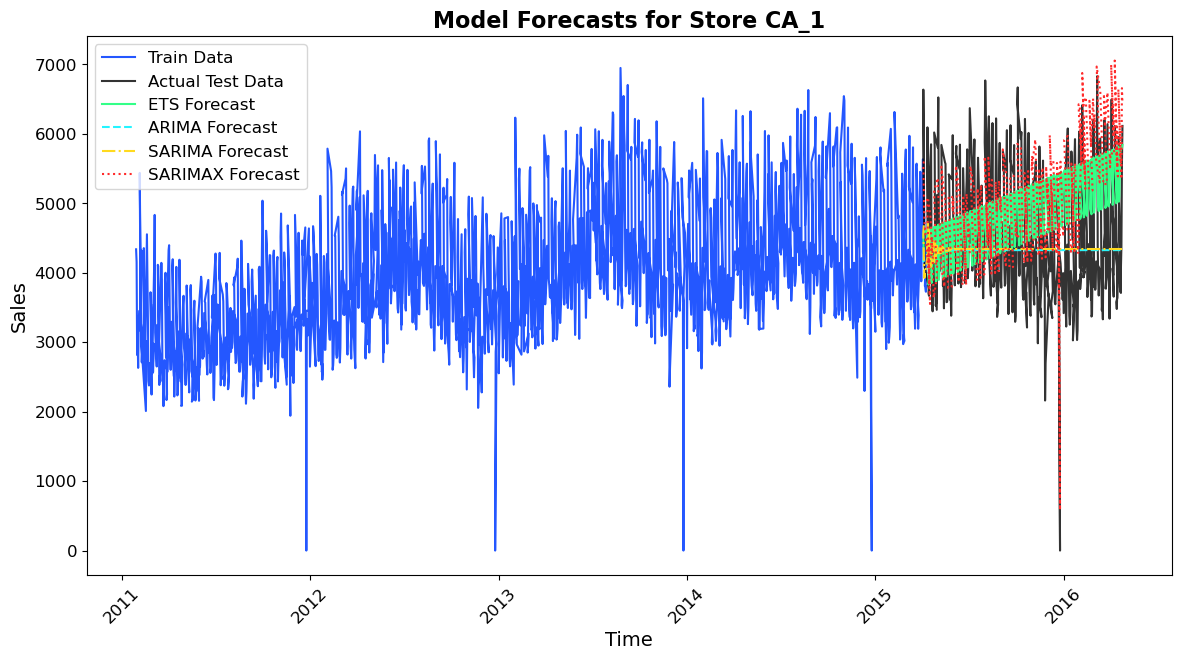


Training models for Store CA_2...
Training ETS Model for Store CA_2
Training ARIMA Model for Store CA_2
Best ARIMA Order for CA_2: (5, 1, 2)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -11882.420
Date:                Mon, 03 Mar 2025   AIC                          23780.839
Time:                        02:51:56   BIC                          23823.498
Sample:                             0   HQIC                         23796.716
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0825      0.035     31

 This problem is unconstrained.



At iterate   10    f=  7.77245D+00    |proj g|=  8.20161D-04

At iterate   15    f=  7.77228D+00    |proj g|=  3.76727D-03

At iterate   20    f=  7.76873D+00    |proj g|=  2.44689D-02

At iterate   25    f=  7.74766D+00    |proj g|=  3.31059D-02

At iterate   30    f=  7.73952D+00    |proj g|=  4.22760D-03

At iterate   35    f=  7.73778D+00    |proj g|=  1.48524D-02

At iterate   40    f=  7.73683D+00    |proj g|=  5.87224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     55      1     0     0   4.669D-07   7.737D+00
  F =   7.7368168975295326     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  7.87831D+00    |proj g|=  2.97283D-03

At iterate   10    f=  7.87830D+00    |proj g|=  1.61120D-02

At iterate   15    f=  7.87773D+00    |proj g|=  2.71315D-01

At iterate   20    f=  7.87397D+00    |proj g|=  5.64496D-02

At iterate   25    f=  7.87361D+00    |proj g|=  4.57833D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     26     31      1     0     0   3.683D-04   7.874D+00
  F =   7.8736083834603292     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

=== SARIMAX Model Summary ===
                                     SARIMAX Results                              

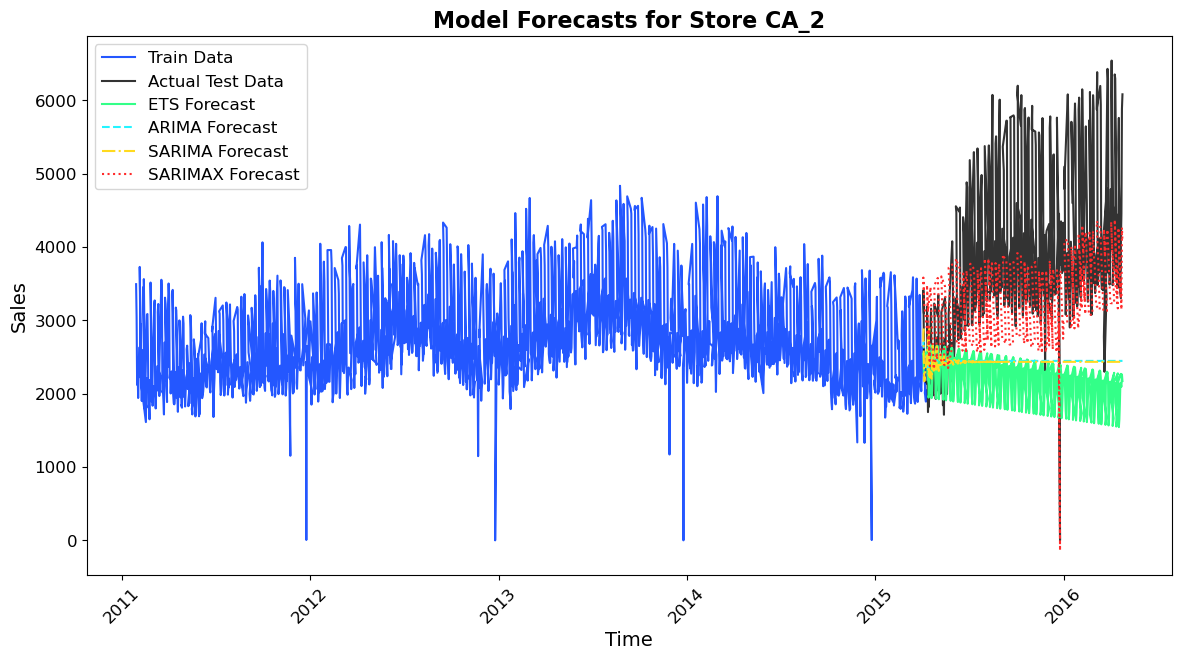


Training models for Store CA_3...
Training ETS Model for Store CA_3
Training ARIMA Model for Store CA_3
Best ARIMA Order for CA_3: (2, 1, 3)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -12433.827
Date:                Mon, 03 Mar 2025   AIC                          24879.654
Time:                        02:54:01   BIC                          24911.648
Sample:                             0   HQIC                         24891.561
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7401      0.016    109

 This problem is unconstrained.



At iterate   10    f=  8.12033D+00    |proj g|=  9.02205D-03

At iterate   15    f=  8.11976D+00    |proj g|=  6.24547D-03

At iterate   20    f=  8.11918D+00    |proj g|=  4.46191D-04

At iterate   25    f=  8.11916D+00    |proj g|=  3.34003D-03

At iterate   30    f=  8.11726D+00    |proj g|=  4.22537D-02

At iterate   35    f=  8.10549D+00    |proj g|=  2.65112D-03

At iterate   40    f=  8.10546D+00    |proj g|=  8.41037D-05

At iterate   45    f=  8.10546D+00    |proj g|=  3.63331D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     50      1     0     0   3.984D-05   8.105D+00
  F =   8.10546386078

 This problem is unconstrained.



At iterate    5    f=  8.38921D+00    |proj g|=  4.84189D-01

At iterate   10    f=  8.09936D+00    |proj g|=  9.27996D-03

At iterate   15    f=  8.09935D+00    |proj g|=  5.65367D-03

At iterate   20    f=  8.09923D+00    |proj g|=  6.81434D-02

At iterate   25    f=  8.09602D+00    |proj g|=  4.37097D-02

At iterate   30    f=  8.09433D+00    |proj g|=  1.19984D-01

At iterate   35    f=  8.08898D+00    |proj g|=  1.37802D-01

At iterate   40    f=  8.08797D+00    |proj g|=  1.94124D-02

At iterate   45    f=  8.08269D+00    |proj g|=  1.98822D-01

At iterate   50    f=  7.99633D+00    |proj g|=  2.48736D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

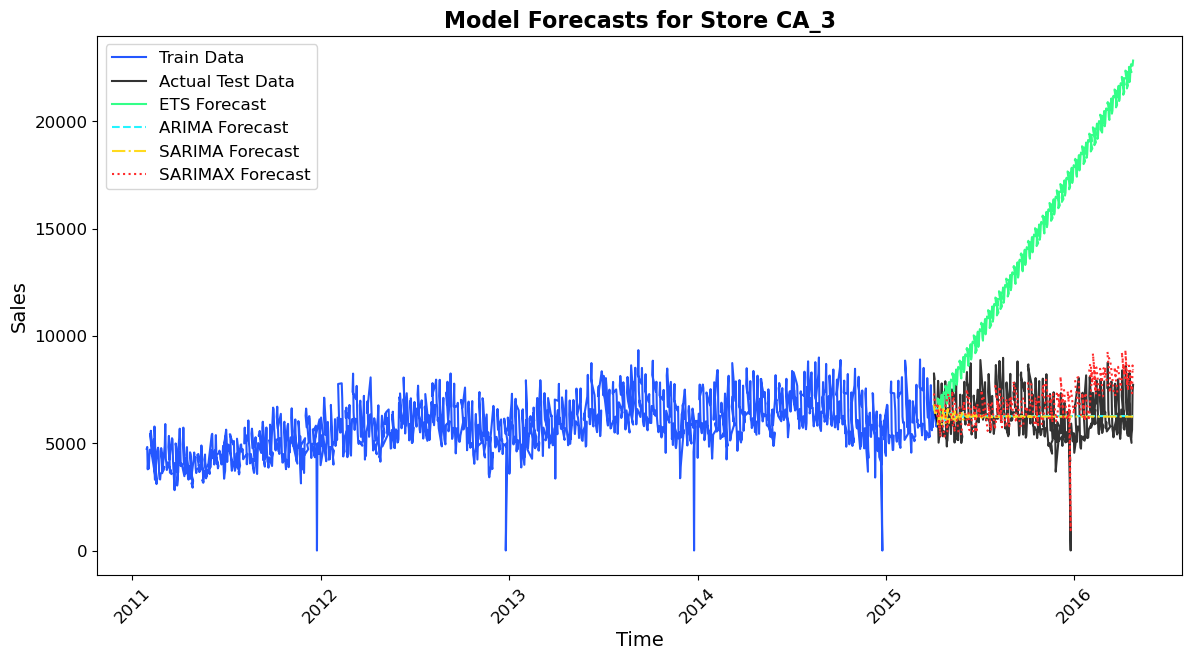


Training models for Store CA_4...
Training ETS Model for Store CA_4
Training ARIMA Model for Store CA_4
Best ARIMA Order for CA_4: (2, 1, 3)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -10689.366
Date:                Mon, 03 Mar 2025   AIC                          21390.733
Time:                        02:57:31   BIC                          21422.727
Sample:                             0   HQIC                         21402.641
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7664      0.011    155

 This problem is unconstrained.



At iterate   10    f=  6.99695D+00    |proj g|=  5.82336D-03

At iterate   15    f=  6.99596D+00    |proj g|=  2.65883D-03

At iterate   20    f=  6.99587D+00    |proj g|=  4.85313D-03

At iterate   25    f=  6.98880D+00    |proj g|=  3.74391D-02

At iterate   30    f=  6.98291D+00    |proj g|=  1.13445D-03

At iterate   35    f=  6.98290D+00    |proj g|=  2.25539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     41      1     0     0   4.294D-06   6.983D+00
  F =   6.9829019762366098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

=== SARIMA Model Summary ===
                     

 This problem is unconstrained.



At iterate    5    f=  7.04378D+00    |proj g|=  6.69664D-03

At iterate   10    f=  7.03959D+00    |proj g|=  1.89621D-01

At iterate   15    f=  7.03697D+00    |proj g|=  1.18117D-03

At iterate   20    f=  7.03674D+00    |proj g|=  1.99211D-02

At iterate   25    f=  7.02132D+00    |proj g|=  1.41168D-01

At iterate   30    f=  6.95311D+00    |proj g|=  5.39918D-02

At iterate   35    f=  6.94771D+00    |proj g|=  5.36447D-03

At iterate   40    f=  6.94563D+00    |proj g|=  8.45805D-03

At iterate   45    f=  6.94503D+00    |proj g|=  9.39975D-03

At iterate   50    f=  6.93939D+00    |proj g|=  1.51689D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

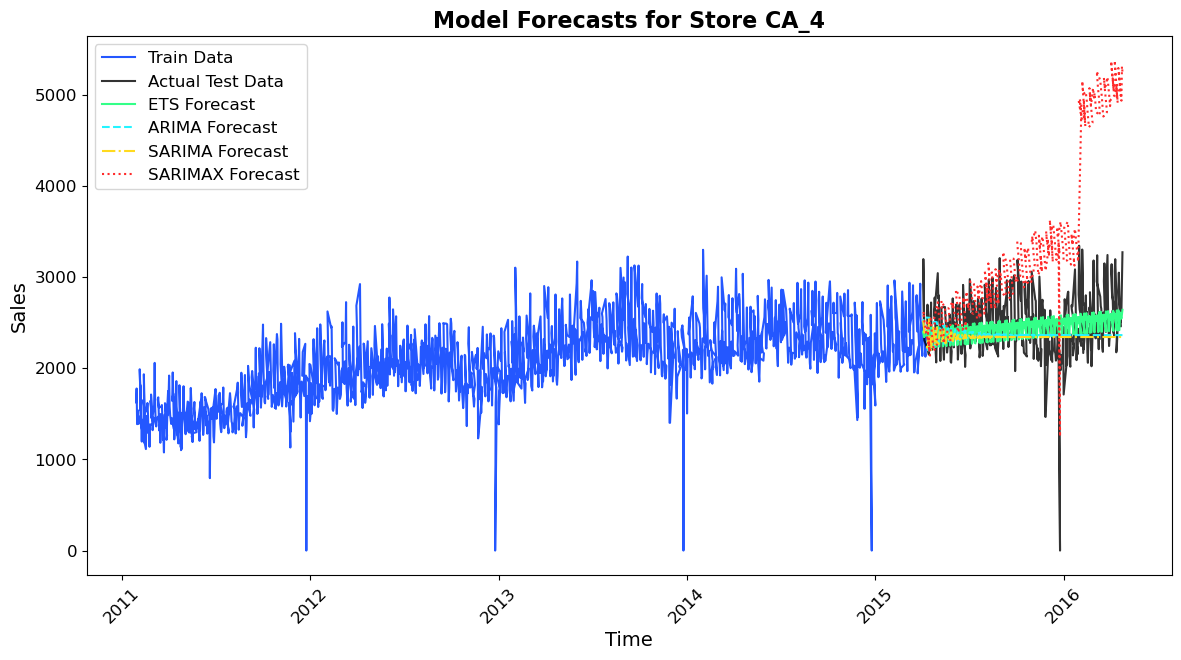


Training models for Store TX_1...
Training ETS Model for Store TX_1
Training ARIMA Model for Store TX_1
Best ARIMA Order for TX_1: (1, 1, 1)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11707.658
Date:                Mon, 03 Mar 2025   AIC                          23421.316
Time:                        02:59:31   BIC                          23437.313
Sample:                             0   HQIC                         23427.270
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3384      0.023     14

 This problem is unconstrained.



At iterate   10    f=  7.64005D+00    |proj g|=  3.69106D-02

At iterate   15    f=  7.62549D+00    |proj g|=  1.76373D-02

At iterate   20    f=  7.62341D+00    |proj g|=  4.29317D-03

At iterate   25    f=  7.62264D+00    |proj g|=  3.83011D-03

At iterate   30    f=  7.62262D+00    |proj g|=  7.05509D-04

At iterate   35    f=  7.62197D+00    |proj g|=  7.57006D-03

At iterate   40    f=  7.61461D+00    |proj g|=  2.71909D-02

At iterate   45    f=  7.61027D+00    |proj g|=  2.21390D-03

At iterate   50    f=  7.61019D+00    |proj g|=  6.71604D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.



At iterate    5    f=  7.79069D+00    |proj g|=  1.75070D+00

At iterate   10    f=  7.66492D+00    |proj g|=  1.70244D-03

At iterate   15    f=  7.66485D+00    |proj g|=  4.34688D-02

At iterate   20    f=  7.65609D+00    |proj g|=  3.18919D-01

At iterate   25    f=  7.64585D+00    |proj g|=  2.98121D-01

At iterate   30    f=  7.63039D+00    |proj g|=  4.64301D-02

At iterate   35    f=  7.62795D+00    |proj g|=  1.17409D-02

At iterate   40    f=  7.62625D+00    |proj g|=  4.52967D-02

At iterate   45    f=  7.61969D+00    |proj g|=  8.48144D-02

At iterate   50    f=  7.61911D+00    |proj g|=  1.48704D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

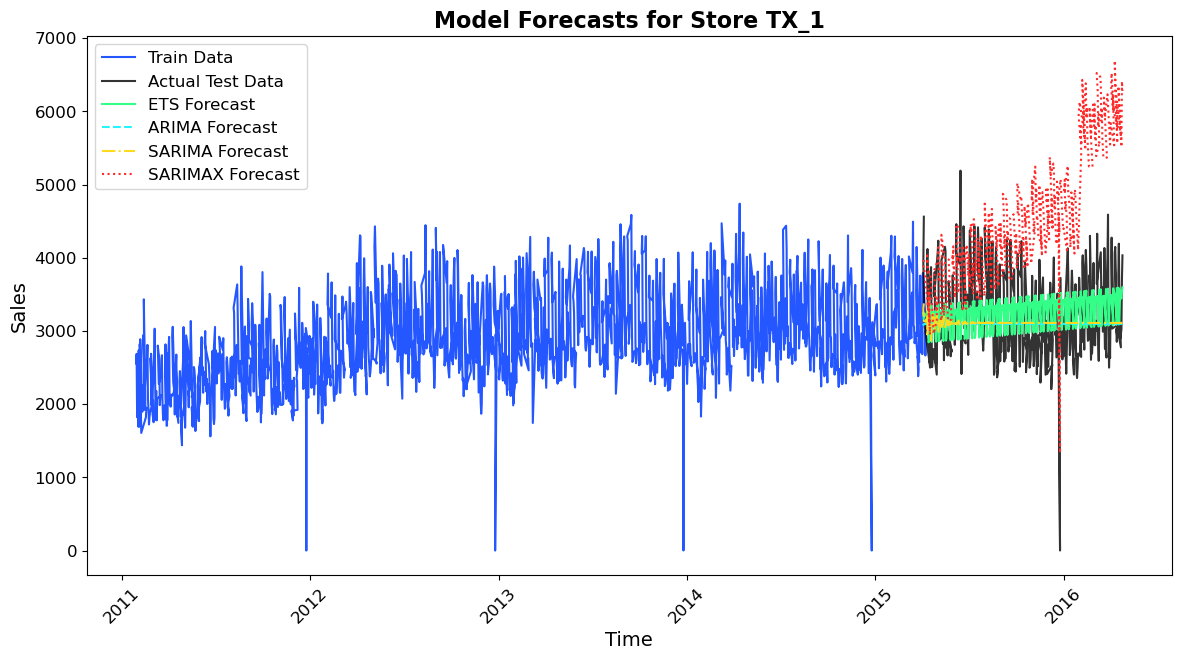


Training models for Store TX_2...
Training ETS Model for Store TX_2
Training ARIMA Model for Store TX_2
Best ARIMA Order for TX_2: (1, 1, 1)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12118.712
Date:                Mon, 03 Mar 2025   AIC                          24243.424
Time:                        03:02:40   BIC                          24259.421
Sample:                             0   HQIC                         24249.378
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3300      0.024     13

 This problem is unconstrained.



At iterate   10    f=  7.88969D+00    |proj g|=  3.32628D-04

At iterate   15    f=  7.88955D+00    |proj g|=  1.07895D-03

At iterate   20    f=  7.88072D+00    |proj g|=  3.10737D-02

At iterate   25    f=  7.87187D+00    |proj g|=  7.96370D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     36      1     0     0   4.539D-06   7.872D+00
  F =   7.8718698434425045     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

=== SARIMA Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                               sold   No

 This problem is unconstrained.



At iterate    5    f=  7.97071D+00    |proj g|=  8.29208D-01

At iterate   10    f=  7.96053D+00    |proj g|=  1.39537D-02

At iterate   15    f=  7.95872D+00    |proj g|=  1.02185D-01

At iterate   20    f=  7.95834D+00    |proj g|=  1.51685D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     20     39      1     0     0   1.517D-03   7.958D+00
  F =   7.9583448592181689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



=== SARIMAX Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                               sold   No. Observations:                 1530
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood              -12176.268
Date:                            Mon, 03 Mar 2025   AIC                          24378.535
Time:                                    03:04:54   BIC                          24447.856
Sample:                                         0   HQIC                         24404.335
                                           - 1530                                         
Covariance Type:                              opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
wm_yr_wk                   2.2341      4.656      0.480    

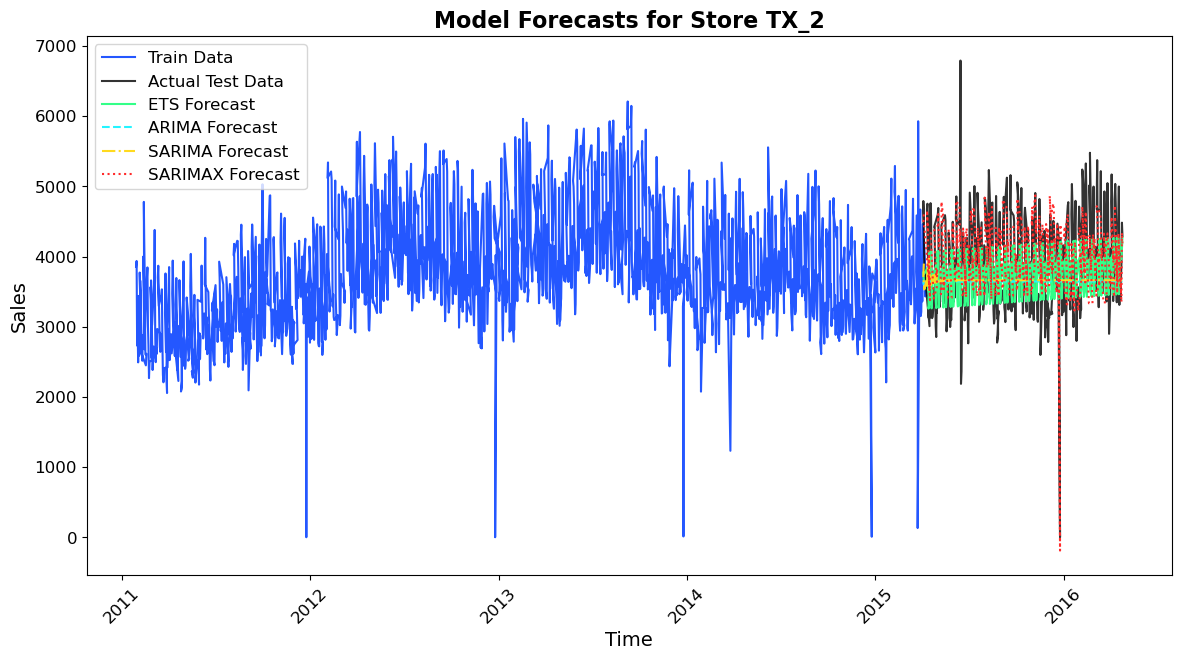


Training models for Store TX_3...
Training ETS Model for Store TX_3
Training ARIMA Model for Store TX_3
Best ARIMA Order for TX_3: (2, 1, 3)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -11587.396
Date:                Mon, 03 Mar 2025   AIC                          23186.793
Time:                        03:05:12   BIC                          23218.787
Sample:                             0   HQIC                         23198.701
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7016      0.023     75

 This problem is unconstrained.



At iterate   10    f=  7.56702D+00    |proj g|=  4.89858D-03

At iterate   15    f=  7.56364D+00    |proj g|=  9.15225D-03

At iterate   20    f=  7.56354D+00    |proj g|=  7.27178D-04

At iterate   25    f=  7.56318D+00    |proj g|=  1.11703D-02

At iterate   30    f=  7.55836D+00    |proj g|=  2.56411D-02

At iterate   35    f=  7.55438D+00    |proj g|=  8.38732D-04

At iterate   40    f=  7.55436D+00    |proj g|=  1.75705D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     52      1     0     0   2.944D-05   7.554D+00
  F =   7.5543567182906068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.63196D+01    |proj g|=  4.52416D-01

At iterate   10    f=  1.37457D+01    |proj g|=  5.67914D+00

At iterate   15    f=  1.17031D+01    |proj g|=  3.02398D+00

At iterate   20    f=  1.12981D+01    |proj g|=  1.41666D+00

At iterate   25    f=  7.69960D+00    |proj g|=  5.23739D-01

At iterate   30    f=  7.47432D+00    |proj g|=  1.47580D-01

At iterate   35    f=  7.46243D+00    |proj g|=  7.56535D-03

At iterate   40    f=  7.45849D+00    |proj g|=  1.01297D-02

At iterate   45    f=  7.45836D+00    |proj g|=  2.95753D-03

At iterate   50    f=  7.45823D+00    |proj g|=  4.58839D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

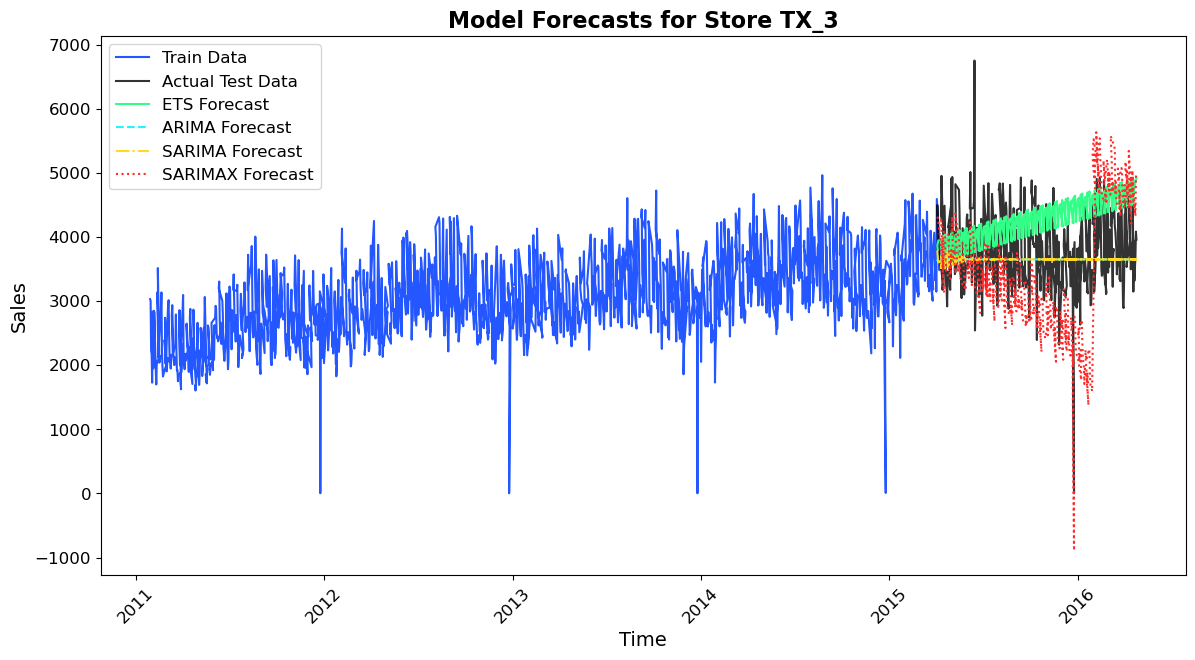


Training models for Store WI_1...
Training ETS Model for Store WI_1
Training ARIMA Model for Store WI_1
Best ARIMA Order for WI_1: (4, 1, 4)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -11880.008
Date:                Mon, 03 Mar 2025   AIC                          23778.016
Time:                        03:08:47   BIC                          23826.007
Sample:                             0   HQIC                         23795.877
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4778      0.026     18

 This problem is unconstrained.


Best SARIMAX Order for WI_1: (1, 1, 1), Seasonal (0, 0, 0, 7)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.10598D+00    |proj g|=  4.25862D+00


 This problem is unconstrained.



At iterate    5    f=  7.94560D+00    |proj g|=  1.92731D-02

At iterate   10    f=  7.94405D+00    |proj g|=  1.28135D-03

At iterate   15    f=  7.94405D+00    |proj g|=  1.50796D-03

At iterate   20    f=  7.94347D+00    |proj g|=  3.68019D-02

At iterate   25    f=  7.92131D+00    |proj g|=  1.35150D-01

At iterate   30    f=  7.82881D+00    |proj g|=  1.73973D-01

At iterate   35    f=  7.74665D+00    |proj g|=  1.68142D-02

At iterate   40    f=  7.74263D+00    |proj g|=  4.13932D-04

At iterate   45    f=  7.73892D+00    |proj g|=  1.19649D-02

At iterate   50    f=  7.71222D+00    |proj g|=  2.95753D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

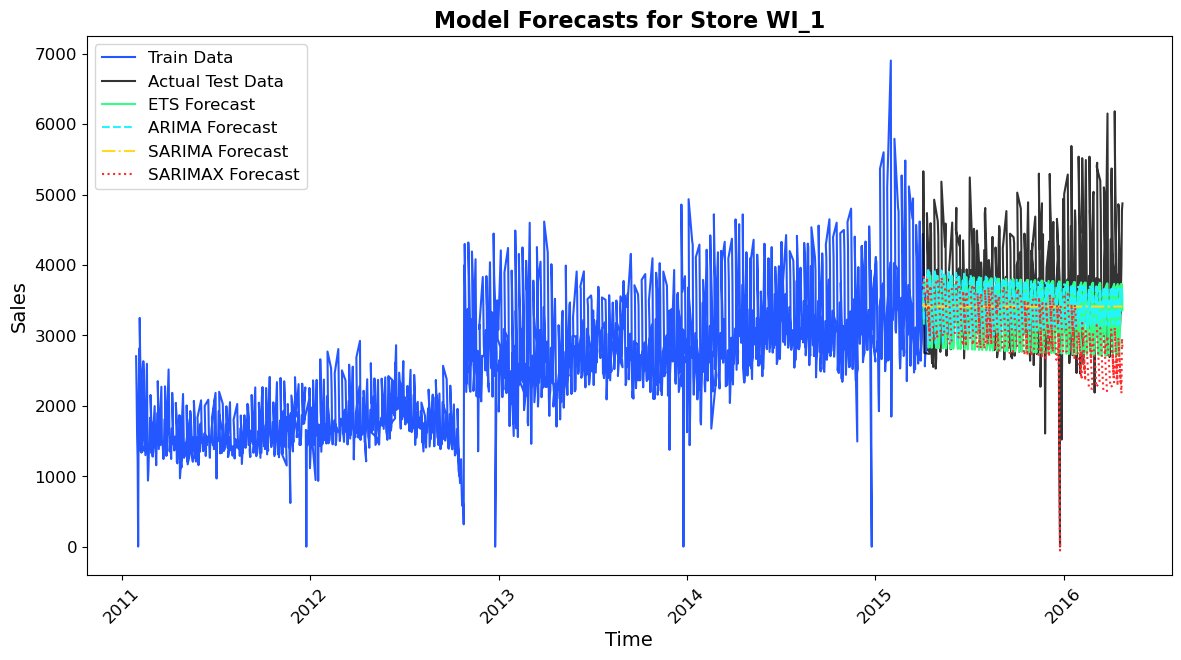


Training models for Store WI_2...
Training ETS Model for Store WI_2
Training ARIMA Model for Store WI_2
Best ARIMA Order for WI_2: (1, 1, 2)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -12057.989
Date:                Mon, 03 Mar 2025   AIC                          24123.977
Time:                        03:09:21   BIC                          24145.307
Sample:                             0   HQIC                         24131.916
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6821      0.038     17

 This problem is unconstrained.



At iterate   15    f=  7.88215D+00    |proj g|=  9.68079D-03

At iterate   20    f=  7.88069D+00    |proj g|=  1.16866D-04

At iterate   25    f=  7.88066D+00    |proj g|=  9.90752D-04

At iterate   30    f=  7.87969D+00    |proj g|=  9.45331D-03

At iterate   35    f=  7.87947D+00    |proj g|=  9.44498D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     41      1     0     0   9.445D-06   7.879D+00
  F =   7.8794675537268368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

=== SARIMA Model Summary ===
                                      SARIMAX Results                              

 This problem is unconstrained.



At iterate    5    f=  7.80410D+00    |proj g|=  1.84287D-01

At iterate   10    f=  7.80094D+00    |proj g|=  1.31619D-03

At iterate   15    f=  7.80076D+00    |proj g|=  4.89423D-02

At iterate   20    f=  7.77624D+00    |proj g|=  3.19836D-01

At iterate   25    f=  7.67152D+00    |proj g|=  1.91550D-01

At iterate   30    f=  7.63014D+00    |proj g|=  1.87385D-02

At iterate   35    f=  7.61851D+00    |proj g|=  1.36568D-02

At iterate   40    f=  7.61738D+00    |proj g|=  4.00940D-04

At iterate   45    f=  7.61733D+00    |proj g|=  1.72506D-03

At iterate   50    f=  7.61104D+00    |proj g|=  5.41757D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

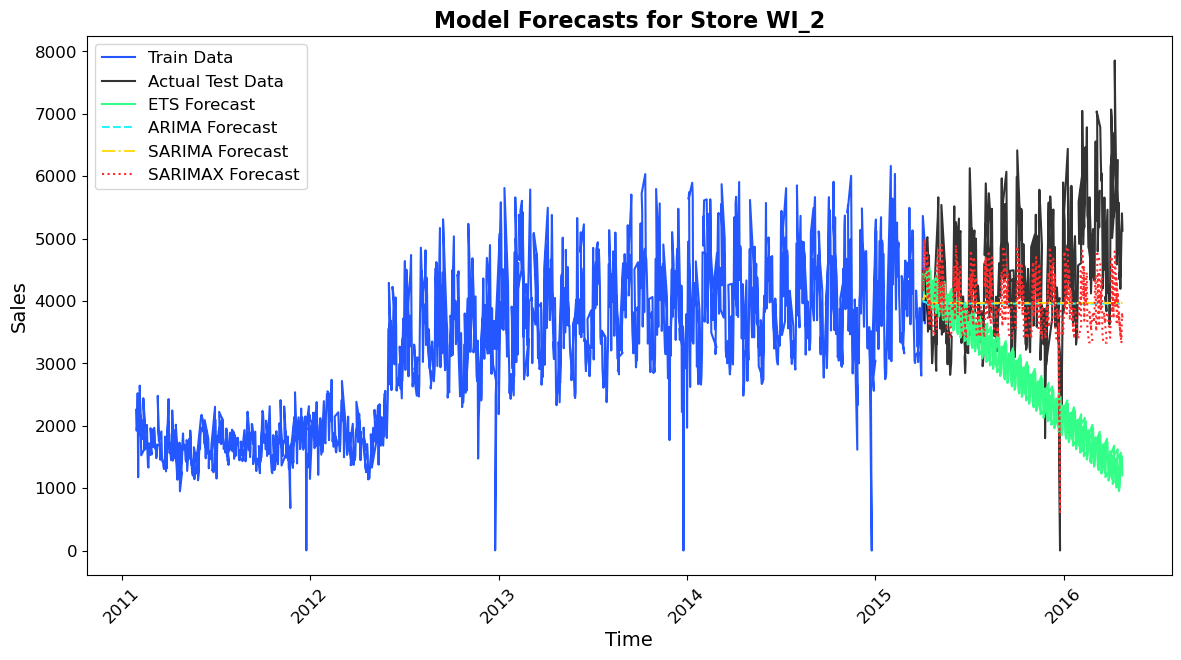


Training models for Store WI_3...
Training ETS Model for Store WI_3
Training ARIMA Model for Store WI_3
Best ARIMA Order for WI_3: (2, 1, 1)

=== ARIMA Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                 1530
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -12142.621
Date:                Mon, 03 Mar 2025   AIC                          24293.241
Time:                        03:10:57   BIC                          24314.571
Sample:                             0   HQIC                         24301.179
                               - 1530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3464      0.024     14

 This problem is unconstrained.



At iterate   10    f=  7.93629D+00    |proj g|=  4.26391D-02

At iterate   15    f=  7.93276D+00    |proj g|=  7.67356D-03

At iterate   20    f=  7.93060D+00    |proj g|=  1.84531D-02

At iterate   25    f=  7.92925D+00    |proj g|=  1.12426D-03

At iterate   30    f=  7.92925D+00    |proj g|=  4.47139D-04

At iterate   35    f=  7.92912D+00    |proj g|=  7.52854D-03

At iterate   40    f=  7.92685D+00    |proj g|=  1.37485D-02

At iterate   45    f=  7.92624D+00    |proj g|=  2.21469D-03

At iterate   50    f=  7.92606D+00    |proj g|=  1.15705D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate    5    f=  7.96327D+00    |proj g|=  5.31905D-01

At iterate   10    f=  7.95463D+00    |proj g|=  3.01888D-03

At iterate   15    f=  7.95447D+00    |proj g|=  9.03056D-02

At iterate   20    f=  7.94853D+00    |proj g|=  1.37674D-01

At iterate   25    f=  7.94473D+00    |proj g|=  1.20266D-01

At iterate   30    f=  7.93562D+00    |proj g|=  4.42855D-02

At iterate   35    f=  7.93518D+00    |proj g|=  8.79108D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  7.93516D+00    |proj g|=  1.60173D-02

At iterate   45    f=  7.93482D+00    |proj g|=  6.86650D-02

At iterate   50    f=  7.93450D+00    |proj g|=  3.90877D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     81      2     0     0   3.909D-02   7.934D+00
  F =   7.9344976413594805     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

=== SARIMAX Model Summary ===
                                     SARIMAX Results                                     
Dep. Variable:                              sold   No. Observations:                 1530
Model:             SARIMAX

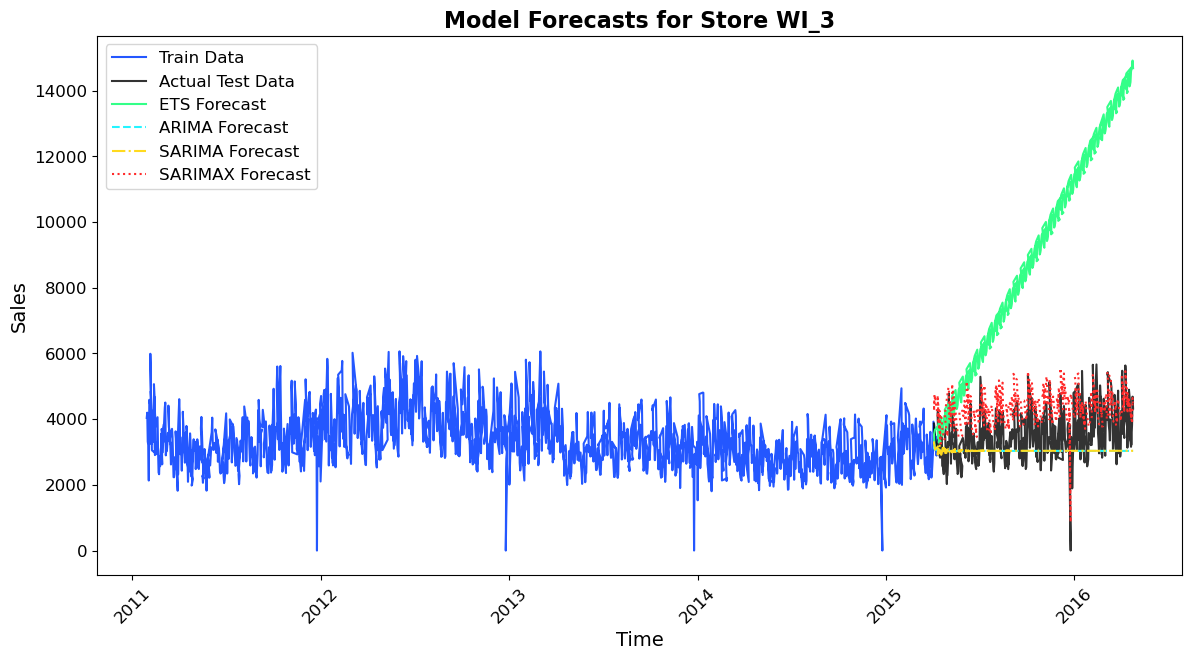

In [113]:
import numpy as np
import pandas as PD
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

# Define exogenous variables
exog_vars = ['wm_yr_wk', 'year', 'wday', 'event_name_1_Christmas', 'snap_WI', 'snap_TX', 'snap_CA', 'sell_price']

def plot_results(train, test, forecasts, conf_intervals, store):
    """Plots actual vs. predicted values for all models with confidence intervals and improved aesthetics."""
    plt.figure(figsize=(14, 7))

    # Define improved color palette
    colors = {
        'Train': '#2457ff',
        'Test': '#000000',
        'ETS': '#33ff88',
        'ARIMA': '#24f4ff',
        'SARIMA': '#ffda1f',
        'SARIMAX': '#ff2b2b'
    }

    # Plot Train and Test Data
    plt.plot(train.index, train, label='Train Data', color=colors['Train'], linewidth=1.5)
    plt.plot(test.index, test, label='Actual Test Data', color=colors['Test'], linewidth=1.5, alpha=0.8)

    # Define model styles
    model_styles = {
        'ETS': ('-', 1.5),
        'ARIMA': ('--', 1.5),
        'SARIMA': ('-.', 1.5),
        'SARIMAX': (':', 1.5)
    }

    # Plot each model's forecast with confidence intervals
    for model_name, forecast in forecasts.items():
        if forecast is not None:
            linestyle, linewidth = model_styles.get(model_name, ('--', 1.5))
            plt.plot(test.index, forecast, label=f'{model_name} Forecast', linestyle=linestyle, color=colors[model_name], linewidth=linewidth)
            
            # Add confidence intervals if available
            if model_name in conf_intervals:
                lower, upper = conf_intervals[model_name]
                plt.fill_between(test.index, lower, upper, color=colors[model_name], alpha=0.2)

    # Improve aesthetics
    plt.legend(loc='upper left', fontsize=12, frameon=True)
    plt.title(f"Model Forecasts for Store {store}", fontsize=16, fontweight='bold')
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Sales", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

def compute_bic(n, sse, k):
    """Compute BIC manually for ETS model."""
    return k * np.log(n) - 2 * (-0.5 * sse)

def train_ets(train, test, store):
    """Train and evaluate ETS model with BIC computation."""
    print(f'Training ETS Model for Store {store}')
    try:
        ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()
        ets_forecast = ets_model.forecast(len(test))

        # Compute BIC manually
        n, sse, k = len(train), ets_model.sse, len(ets_model.params)
        bic = compute_bic(n, sse, k)

        return ets_forecast, {
            'Model': 'ETS(A,A,A)',
            'RMSE': np.sqrt(mean_squared_error(test, ets_forecast)),
            'MAE': mean_absolute_error(test, ets_forecast),
            'AIC': ets_model.aic if hasattr(ets_model, 'aic') else None,
            'BIC': bic
        }, None
    except Exception as e:
        print(f"ETS failed for {store}: {e}")
        return None, None, None

def train_auto_arima(train, test, store):
    """Train and evaluate ARIMA with automatic order selection."""
    print(f'Training ARIMA Model for Store {store}')
    try:
        auto_arima_model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
        best_order = auto_arima_model.order
        print(f"Best ARIMA Order for {store}: {best_order}")
        
        arima_model = ARIMA(train, order=best_order).fit()
        arima_forecast = arima_model.get_forecast(len(test))

        # Confidence intervals
        conf_int = arima_forecast.conf_int()
        lower, upper = conf_int.iloc[:, 0], conf_int.iloc[:, 1]

        print("\n=== ARIMA Model Summary ===")
        print(arima_model.summary()) 
        
        return arima_forecast.predicted_mean, {
            'Model': f'ARIMA{best_order}',
            'RMSE': np.sqrt(mean_squared_error(test, arima_forecast.predicted_mean)),
            'MAE': mean_absolute_error(test, arima_forecast.predicted_mean),
            'AIC': arima_model.aic,
            'BIC': arima_model.bic
        }, (lower, upper)
    except Exception as e:
        print(f"ARIMA failed for {store}: {e}")
        return None, None, None

def train_auto_sarima(train, test, store):
    """Train and evaluate SARIMA with automatic order selection."""
    print(f'Training SARIMA Model for Store {store}')
    try:
        auto_sarima_model = auto_arima(train, seasonal=True, m=7, stepwise=True, suppress_warnings=True)
        best_order, best_seasonal_order = auto_sarima_model.order, auto_sarima_model.seasonal_order
        print(f"Best SARIMA Order for {store}: {best_order}, Seasonal {best_seasonal_order}")

        sarima_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order).fit()
        sarima_forecast = sarima_model.get_forecast(len(test))

        # Confidence intervals
        conf_int = sarima_forecast.conf_int()
        lower, upper = conf_int.iloc[:, 0], conf_int.iloc[:, 1]

        print("\n=== SARIMA Model Summary ===")
        print(sarima_model.summary()) 
        
        return sarima_forecast.predicted_mean, {
            'Model': f'SARIMA{best_order}x{best_seasonal_order}',
            'RMSE': np.sqrt(mean_squared_error(test, sarima_forecast.predicted_mean)),
            'MAE': mean_absolute_error(test, sarima_forecast.predicted_mean),
            'AIC': sarima_model.aic,
            'BIC': sarima_model.bic
        }, (lower, upper)
    except Exception as e:
        print(f"SARIMA failed for {store}: {e}")
        return None, None, None

def train_auto_sarimax(train, test, train_exog, test_exog, store):
    """Train SARIMAX with exogenous variables and auto-order selection."""
    print(f'Training SARIMAX Model for Store {store}')
    try:
        if train_exog is not None and test_exog is not None:
            train_exog = train_exog.astype({col: 'int8' for col in train_exog.select_dtypes(include=['bool']).columns})
            test_exog = test_exog.astype({col: 'int8' for col in test_exog.select_dtypes(include=['bool']).columns})

            # Ensure alignment of indices
            train_exog = train_exog.loc[train.index]
            test_exog = test_exog.loc[test.index]

            auto_sarimax_model = auto_arima(train, exogenous=train_exog, seasonal=True, m=7, stepwise=True, suppress_warnings=True)
            best_order, best_seasonal_order = auto_sarimax_model.order, auto_sarimax_model.seasonal_order
            print(f"Best SARIMAX Order for {store}: {best_order}, Seasonal {best_seasonal_order}")

            sarimax_model = SARIMAX(train, exog=train_exog, order=best_order, seasonal_order=best_seasonal_order).fit()
            sarimax_forecast = sarimax_model.get_forecast(len(test), exog=test_exog)

            # Confidence intervals
            conf_int = sarimax_forecast.conf_int()
            lower, upper = conf_int.iloc[:, 0], conf_int.iloc[:, 1]

            print("\n=== SARIMAX Model Summary ===")
            print(sarimax_model.summary())

            return sarimax_forecast.predicted_mean, {
                'Model': f'SARIMAX{best_order}x{best_seasonal_order}',
                'RMSE': np.sqrt(mean_squared_error(test, sarimax_forecast.predicted_mean)),
                'MAE': mean_absolute_error(test, sarimax_forecast.predicted_mean),
                'AIC': sarimax_model.aic,
                'BIC': sarimax_model.bic
            }, (lower, upper)
        else:
            print(f"SARIMAX skipped for {store}: Missing exogenous variables")
            return None, None, None
    except Exception as e:
        print(f"SARIMAX failed for {store}: {e}")
        return None, None, None

def evaluate_models(df):
    """Train and evaluate all models for each store."""
    stores = df['store_id'].unique()
    results = {}

    for store in stores:
        train = split_data[store]['train']
        test = split_data[store]['test']
        train_exog = split_data[store]['train_exog'][exog_vars]
        test_exog = split_data[store]['test_exog'][exog_vars]

        print(f"\nTraining models for Store {store}...")

        store_results = {}
        conf_intervals = {}

        ets_forecast, ets_metrics, _ = train_ets(train, test, store)
        arima_forecast, arima_metrics, arima_ci = train_auto_arima(train, test, store)
        sarima_forecast, sarima_metrics, sarima_ci = train_auto_sarima(train, test, store)
        sarimax_forecast, sarimax_metrics, sarimax_ci = train_auto_sarimax(train, test, train_exog, test_exog, store)

        store_results['ETS'] = ets_metrics
        store_results['ARIMA'] = arima_metrics
        store_results['SARIMA'] = sarima_metrics
        store_results['SARIMAX'] = sarimax_metrics

        plot_results(train, test, {'ETS': ets_forecast, 'ARIMA': arima_forecast, 'SARIMA': sarima_forecast, 'SARIMAX': sarimax_forecast}, conf_intervals, store)

        results[store] = store_results

    return results

model_performance = evaluate_models(df_encoded)

### Display Results in a Table

In [119]:
import pandas as pd
from IPython.display import display  # Jupyter display function

# Display Results
def display_results(results):
    """ Display results in a Pandas DataFrame """
    table_data = []
    
    for store, models in results.items():
        for model_name, metrics in models.items():
            if metrics:  # Ensure the model did not fail
                table_data.append([
                    store, model_name, 
                    round(metrics['RMSE'], 2) if metrics['RMSE'] else None, 
                    round(metrics['MAE'], 2) if metrics['MAE'] else None, 
                    round(metrics['AIC'], 2) if metrics['AIC'] else None, 
                    round(metrics['BIC'], 2) if metrics['BIC'] else None
                ])
    
    # Convert to DataFrame
    df_results = pd.DataFrame(table_data, columns=['Store', 'Model', 'RMSE', 'MAE', 'AIC', 'BIC'])
    
    # Handle empty results
    if df_results.empty:
        print("No model results available!")
        return

    # Display DataFrame
    display(df_results)

    return df_results  # Returns a Pandas DataFrame for further use

# Show results
df_model_performance = display_results(model_performance)

Store    Model     RMSE      MAE       AIC           BIC
0   CA_1      ETS  1090.77   888.65  20625.09  1.078777e+09
1   CA_1    ARIMA   924.66   733.64  24664.23  2.470155e+04
2   CA_1   SARIMA   925.26   738.78  24552.79  2.459012e+04
3   CA_1  SARIMAX  1086.60   888.02  23987.40  2.406739e+04
4   CA_2      ETS  1997.83  1693.45  19604.04  5.534827e+08
5   CA_2    ARIMA  1772.43  1444.69  23780.84  2.382350e+04
6   CA_2   SARIMA  1782.53  1453.78  23684.66  2.371132e+04
7   CA_2  SARIMAX  1034.02   772.56  24119.24  2.418856e+04
8   CA_3      ETS  9557.82  8263.52  20828.14  1.231876e+09
9   CA_3    ARIMA  1062.94   840.03  24879.65  2.491165e+04
10  CA_3   SARIMA  1074.55   845.10  24816.72  2.485405e+04
11  CA_3  SARIMAX  1218.32   979.16  24498.77  2.457876e+04
12  CA_4      ETS   313.21   227.62  17333.10  1.254559e+08
13  CA_4    ARIMA   339.87   250.10  21390.73  2.142273e+04
14  CA_4   SARIMA   344.95   252.35  21379.68  2.141167e+04
15  CA_4  SARIMAX  1286.49   959.11  21262.52  2.133718e+04
16  TX_1      ETS   560.54   440.60  19242.27  4.369321e+08
17  TX_1    ARIMA   571.26   441.21  23421.32  2.343731e+04
18  TX_1   SARIMA   573.67   445.49  23301.18  2.333850e+04
19  TX_1  SARIMAX  1630.73  1391.00  23344.49  2.342448e+04
20  TX_2      ETS   648.58   489.30  20031.41  7.318390e+08
21  TX_2    ARIMA   697.42   528.97  24243.42  2.425942e+04
22  TX_2   SARIMA   692.61   526.74  24097.92  2.412458e+04
23  TX_2  SARIMAX   552.59   456.37  24378.54  2.444786e+04
24  TX_3      ETS   836.76   677.61  19113.58  4.016844e+08
25  TX_3    ARIMA   590.48   446.86  23186.79  2.321879e+04
26  TX_3   SARIMA   593.07   448.87  23130.33  2.316766e+04
27  TX_3  SARIMAX   937.14   794.15  22852.20  2.293218e+04
28  WI_1      ETS   807.78   595.27  19517.95  5.232000e+08
29  WI_1    ARIMA   774.61   572.34  23778.02  2.382601e+04
30  WI_1   SARIMA   826.18   633.29  23901.59  2.391759e+04
31  WI_1  SARIMAX   930.09   697.64  23621.41  2.368006e+04
32  WI_2      ETS  2324.71  1872.11  19868.89  6.580857e+08
33  WI_2    ARIMA  1099.49   852.26  24123.98  2.414531e+04
34  WI_2   SARIMA  1095.33   849.27  24121.17  2.414783e+04
35  WI_2  SARIMAX   917.21   691.48  23315.77  2.338509e+04
36  WI_3      ETS  6285.64  5516.72  20095.10  7.629431e+08
37  WI_3    ARIMA   877.93   658.51  24293.24  2.431457e+04
38  WI_3   SARIMA   878.36   659.20  24267.73  2.430506e+04
39  WI_3  SARIMAX   996.98   887.08  24309.56  2.438955e+04

In [121]:
import pandas as pd
from IPython.display import display  # Jupyter display function

# Display Results
def display_results(results):
    """ Display results in a Pandas DataFrame """
    table_data = []
    
    for store, models in results.items():
        for model_name, metrics in models.items():
            if metrics:  # Ensure the model did not fail
                table_data.append([
                    store, model_name, 
                    round(metrics['RMSE'], 2) if metrics['RMSE'] else None, 
                    round(metrics['MAE'], 2) if metrics['MAE'] else None, 
                    round(metrics['AIC'], 2) if metrics['AIC'] else None, 
                ])
    
    # Convert to DataFrame
    df_results = pd.DataFrame(table_data, columns=['Store', 'Model', 'RMSE', 'MAE', 'AIC'])
    
    # Handle empty results
    if df_results.empty:
        print("No model results available!")
        return

    # Display DataFrame
    display(df_results)

    return df_results  # Returns a Pandas DataFrame for further use

# Show results
df_model_performance = display_results(model_performance)

Store    Model     RMSE      MAE       AIC
0   CA_1      ETS  1090.77   888.65  20625.09
1   CA_1    ARIMA   924.66   733.64  24664.23
2   CA_1   SARIMA   925.26   738.78  24552.79
3   CA_1  SARIMAX  1086.60   888.02  23987.40
4   CA_2      ETS  1997.83  1693.45  19604.04
5   CA_2    ARIMA  1772.43  1444.69  23780.84
6   CA_2   SARIMA  1782.53  1453.78  23684.66
7   CA_2  SARIMAX  1034.02   772.56  24119.24
8   CA_3      ETS  9557.82  8263.52  20828.14
9   CA_3    ARIMA  1062.94   840.03  24879.65
10  CA_3   SARIMA  1074.55   845.10  24816.72
11  CA_3  SARIMAX  1218.32   979.16  24498.77
12  CA_4      ETS   313.21   227.62  17333.10
13  CA_4    ARIMA   339.87   250.10  21390.73
14  CA_4   SARIMA   344.95   252.35  21379.68
15  CA_4  SARIMAX  1286.49   959.11  21262.52
16  TX_1      ETS   560.54   440.60  19242.27
17  TX_1    ARIMA   571.26   441.21  23421.32
18  TX_1   SARIMA   573.67   445.49  23301.18
19  TX_1  SARIMAX  1630.73  1391.00  23344.49
20  TX_2      ETS   648.58   489.30  20031.41
21  TX_2    ARIMA   697.42   528.97  24243.42
22  TX_2   SARIMA   692.61   526.74  24097.92
23  TX_2  SARIMAX   552.59   456.37  24378.54
24  TX_3      ETS   836.76   677.61  19113.58
25  TX_3    ARIMA   590.48   446.86  23186.79
26  TX_3   SARIMA   593.07   448.87  23130.33
27  TX_3  SARIMAX   937.14   794.15  22852.20
28  WI_1      ETS   807.78   595.27  19517.95
29  WI_1    ARIMA   774.61   572.34  23778.02
30  WI_1   SARIMA   826.18   633.29  23901.59
31  WI_1  SARIMAX   930.09   697.64  23621.41
32  WI_2      ETS  2324.71  1872.11  19868.89
33  WI_2    ARIMA  1099.49   852.26  24123.98
34  WI_2   SARIMA  1095.33   849.27  24121.17
35  WI_2  SARIMAX   917.21   691.48  23315.77
36  WI_3      ETS  6285.64  5516.72  20095.10
37  WI_3    ARIMA   877.93   658.51  24293.24
38  WI_3   SARIMA   878.36   659.20  24267.73
39  WI_3  SARIMAX   996.98   887.08  24309.56